## Name- Prashant shrivastava
## TITLE - EDA NYC YELLOW TAXI DATA ANALYSIS

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [9]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")



In [10]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
!where python

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
C:\Users\prash\anaconda3\python.exe
C:\Users\prash\AppData\Local\Microsoft\WindowsApps\python.exe


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [12]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

jan_data = pd.read_parquet("2023-1.parquet")
jan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [13]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

# Step: Efficiently sample 5% from each monthly file (to avoid loading everything at once)

import glob
import pandas as pd

# Set the path pattern for your monthly parquet files
data_folder = r"C:\Users\prash\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\*.parquet"

# Find all parquet files in the folder
monthly_files = glob.glob(data_folder)

# List to store sampled DataFrames for each file
monthly_samples = []

for filepath in monthly_files:
    # Load one file at a time
    temp_df = pd.read_parquet(filepath)
    
    # Optional: Create date and hour columns if needed for stratified sampling
    # temp_df['pickup_date'] = pd.to_datetime(temp_df['tpep_pickup_datetime']).dt.date
    # temp_df['pickup_hour'] = pd.to_datetime(temp_df['tpep_pickup_datetime']).dt.hour

    # Sample 5% of the rows randomly from this file
    file_sample = temp_df.sample(frac=0.05, random_state=42)
    
    # Collect the sample
    monthly_samples.append(file_sample)

# Combine all sampled pieces into a single DataFrame
taxi_sampled = pd.concat(monthly_samples, ignore_index=True)

# Quick info on the combined sample
print("Sampled data info:")
taxi_sampled.info()
print("\nFirst few rows:")
print(taxi_sampled.head())

Sampled data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206368 entries, 0 to 2206367
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  air

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\Users\prash\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [16]:
# Store the df in csv/parquet
# df.to_parquet('')
# Export the sampled data to a Parquet file without the index column
taxi_sampled.to_parquet("nyc_taxi_hourly_sampled.parquet", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [40]:
# Load the new data file

# Read the saved hourly-sampled Parquet file into a DataFrame
hourly_sampled_df = pd.read_parquet(r"C:\Users\prash\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\nyc_taxi_hourly_sampled.parquet")

In [44]:
hourly_sampled_df.head(12)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1          2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2          2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3          2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4          1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
5          2  2023-01-03 16:17:30   2023-01-03 16:35:27              2.0   
6          2  2023-01-03 19:52:03   2023-01-03 19:55:24              1.0   
7          2  2023-01-15 15:41:41   2023-01-15 15:54:03              1.0   
8          1  2023-01-24 21:55:51   2023-01-24 22:05:17              2.0   
9          2  2023-01-24 16:18:02   2023-01-24 16:25:33              1.0   
10         2  2023-01-11 09:40:24   2023-01-11 09:54:18              1.0   
11         1  2023-01-12 14:10:57   2023-01-12 14:24:46              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.90         1.0                  N           239           236   
1            1.86         1.0                  N           239           162   
2            0.50         1.0                  N           162           170   
3            2.56         1.0                  N           162           262   
4            2.80         1.0                  N           164           231   
5            2.69         1.0                  N           161           239   
6            0.87         1.0                  N           151           239   
7            1.86         1.0                  N           211           234   
8            2.40         1.0                  N           164           236   
9            1.10         1.0                  N           234           164   
10           2.33         1.0                  N           238           237   
11           1.00         1.0                  N           164           230   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              1         13.5    2.5      0.5        2.50           0.0   
1              1         14.2    0.0      0.5        3.64           0.0   
2              1          5.1    1.0      0.5        2.02           0.0   
3              1         17.0    2.5      0.5        4.70           0.0   
4              1         14.9    3.5      0.5        3.98           0.0   
5              1         17.7    2.5      0.5        2.00           0.0   
6              1          6.5    2.5      0.5        1.00           0.0   
7              1         13.5    0.0      0.5        3.50           0.0   
8              1         12.1    3.5      0.5        4.25           0.0   
9              2          8.6    2.5      0.5        0.00           0.0   
10             1         15.6    0.0      0.5        4.90           0.0   
11             2         11.4    2.5      0.5        0.00           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                     1.0         20.00                   2.5          0.0   
1                     1.0         21.84                   2.5          0.0   
2                     1.0         12.12                   2.5          0.0   
3                     1.0         28.20                   2.5          0.0   
4                     1.0         23.88                   2.5          0.0   
5                     1.0         26.20                   2.5          0.0   
6                     1.0         14.00                   2.5          0.0   
7                     1.0         21.00                   2.5          0.0   
8                     1.0         21.35                   2.5          0.0   
9                     1.0         15.10                   2.5          0.0   
10                    1.0         24.50                   2.5          0.0   
11                    1.0         15.40                   2.5 

In [46]:
hourly_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206368 entries, 0 to 2206367
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [47]:
# Fix the index and drop any columns that are not needed

# Remove unwanted columns and reset the index

# Remove specified columns if present and reset the DataFrame index
unwanted_cols = ["store_and_fwd_flag", "extra", "mta_tax", "improvement_surcharge"]
hourly_sampled_df.drop(columns=unwanted_cols, inplace=True, errors="ignore")
hourly_sampled_df.reset_index(drop=True, inplace=True)

# Display final column names
print("Columns after cleaning:", list(hourly_sampled_df.columns))

Columns after cleaning: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [48]:
# Combine the two airport fee columns

# Combine 'Airport_fee' and 'airport_fee' columns into one, adding values and handling missing data

if "Airport_fee" in hourly_sampled_df.columns and "airport_fee" in hourly_sampled_df.columns:
    hourly_sampled_df["Airport_fee"] = hourly_sampled_df["Airport_fee"].fillna(0) + hourly_sampled_df["airport_fee"].fillna(0)
    hourly_sampled_df.drop(columns=["airport_fee"], inplace=True, errors="ignore")

# Check the updated columns
print("Columns after combining airport fees:", list(hourly_sampled_df.columns))

Columns after combining airport fees: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [49]:
# check where values of fare amount are negative

# Find and display all rows where fare_amount is negative

negative_fares = hourly_sampled_df[hourly_sampled_df["fare_amount"] < 0]
print(negative_fares)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount, congestion_surcharge, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [50]:
# Analyse RatecodeID for the negative fare amounts

negative_fares = hourly_sampled_df[hourly_sampled_df["fare_amount"] < 0]

if negative_fares.empty:
    print("No records with negative fare amounts were found.")
else:
    print("Distribution of RatecodeID for negative fares:")
    print(negative_fares["RatecodeID"].value_counts())

No records with negative fare amounts were found.


In [51]:
# Find which columns have negative values

numeric_cols = hourly_sampled_df.select_dtypes(include=[np.number]).columns
has_negative = (hourly_sampled_df[numeric_cols] < 0).any()

cols_with_neg = has_negative[has_negative].index.tolist()

if not cols_with_neg:
    print("No negative values detected in any numeric columns.\n")
else:
    print("Columns with negative values:", cols_with_neg)
    print(hourly_sampled_df[cols_with_neg].describe())

Columns with negative values: ['tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']
       tolls_amount  total_amount  congestion_surcharge   Airport_fee
count  2.206368e+06  2.206368e+06          2.130848e+06  2.206368e+06
mean   6.012213e-01  2.897652e+01          2.309063e+00  1.386867e-01
std    2.197108e+00  2.300949e+01          6.643359e-01  4.585841e-01
min   -6.940000e+00 -1.769000e+01         -2.500000e+00 -1.750000e+00
25%    0.000000e+00  1.596000e+01          2.500000e+00  0.000000e+00
50%    0.000000e+00  2.100000e+01          2.500000e+00  0.000000e+00
75%    0.000000e+00  3.100000e+01          2.500000e+00  0.000000e+00
max    1.320400e+02  2.203140e+03          2.500000e+00  1.750000e+00


In [52]:
# fix these negative values
# Replace any negative values in all numeric columns with zero

num_cols = hourly_sampled_df.select_dtypes(include=[np.number]).columns
hourly_sampled_df[num_cols] = hourly_sampled_df[num_cols].clip(lower=0)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [53]:
# Find the proportion of missing values in each column
missing_percent = hourly_sampled_df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Percentage of missing values by column:\n", missing_percent)

Percentage of missing values by column:
 passenger_count         3.42282
RatecodeID              3.42282
congestion_surcharge    3.42282
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [55]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_rows = hourly_sampled_df[hourly_sampled_df.isnull().any(axis=1)]
print("Rows with missing values:\n",missing_rows)

Rows with missing values:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
155             2  2023-01-20 15:15:17   2023-01-20 15:27:06              NaN   
157             2  2023-01-21 15:17:59   2023-01-21 15:39:36              NaN   
303             2  2023-01-28 23:58:47   2023-01-29 00:11:44              NaN   
309             1  2023-01-21 02:51:57   2023-01-21 03:15:22              NaN   
356             2  2023-01-17 21:22:28   2023-01-17 21:36:25              NaN   
...           ...                  ...                   ...              ...   
2206161         1  2023-10-18 00:16:16   2023-10-18 00:25:59              NaN   
2206218         1  2023-11-14 14:31:46   2023-11-14 14:37:26              NaN   
2206240         2  2023-12-22 16:58:07   2023-12-22 17:07:49              NaN   
2206283         1  2023-09-16 23:06:03   2023-09-16 23:18:34              NaN   
2206310         2  2023-11-09 11:33:42   2023-11-09 11:59:54              NaN   



Did you find zeroes in passenger_count? Handle these.

In [56]:
# Replace zero values in 'passenger_count' with the median
median_passenger = hourly_sampled_df["passenger_count"].median()
hourly_sampled_df.loc[hourly_sampled_df["passenger_count"] == 0, "passenger_count"] = median_passenger

# Show rows that still have missing values after handling 'passenger_count'
still_missing = hourly_sampled_df[hourly_sampled_df.isnull().any(axis=1)]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [57]:
# Fix missing values in 'RatecodeID'
if "RatecodeID" in hourly_sampled_df.columns:
    most_common_ratecode = hourly_sampled_df["RatecodeID"].mode()[0]
    hourly_sampled_df["RatecodeID"] = hourly_sampled_df["RatecodeID"].fillna(most_common_ratecode)
    print("Missing RatecodeID values after filling:", hourly_sampled_df["RatecodeID"].isnull().sum())

Missing RatecodeID values after filling: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [58]:
# handle null values in congestion_surcharge


median_congestion = hourly_sampled_df["congestion_surcharge"].median()
hourly_sampled_df["congestion_surcharge"] = hourly_sampled_df["congestion_surcharge"].fillna(median_congestion)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [59]:
# Handle any remaining missing values
# Fill any remaining missing values: mode for objects, median for numerics

for column in hourly_sampled_df.columns:
    if hourly_sampled_df[column].isnull().any():
        if hourly_sampled_df[column].dtype == "object":
            mode_val = hourly_sampled_df[column].mode()[0]
            hourly_sampled_df[column] = hourly_sampled_df[column].fillna(mode_val)
        else:
            med_val = hourly_sampled_df[column].median()
            hourly_sampled_df[column] = hourly_sampled_df[column].fillna(med_val)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [62]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Show summary statistics for numeric features and look for potential outliers
print("Summary of dataset:\n", hourly_sampled_df.describe())

# Function to identify outliers using the IQR method
def get_outlier_counts(data, columns):
    outlier_summary = {}
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        count = ((data[column] < low) | (data[column] > high)).sum()
        if count > 0:
            outlier_summary[column] = count
    return outlier_summary

# Choose numeric columns to check
num_features = hourly_sampled_df.select_dtypes(include=[np.number]).columns
outlier_counts = get_outlier_counts(hourly_sampled_df, num_features)

# Print outlier results
print("\nColumns with detected outliers:")
for col, cnt in outlier_counts.items():
    print(f" - {col}: {cnt} potential outliers")

Summary of dataset:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.206368e+06                     2206368                     2206368   
mean   1.736116e+00  2023-07-02 21:05:14.935172  2023-07-02 21:22:47.061209   
min    1.000000e+00         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%    1.000000e+00  2023-04-02 16:58:35.500000  2023-04-02 17:19:20.250000   
50%    2.000000e+00         2023-06-27 16:10:30         2023-06-27 16:29:48   
75%    2.000000e+00  2023-10-06 21:18:30.500000  2023-10-06 21:35:50.500000   
max    6.000000e+00         2023-12-31 23:58:14         2024-01-01 23:02:22   
std    4.464081e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.206368e+06   2.206368e+06  2.206368e+06  2.206368e+06   
mean      1.372617e+00   4.109295e+00  1.623874e+00  1.651984e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.00000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [63]:
# remove passenger_count > 6
# Filter out trips with more than 6 passengers
hourly_sampled_df = hourly_sampled_df[hourly_sampled_df["passenger_count"] <= 6]

# Show distribution after filtering
print("Passenger count distribution after cleaning:\n", hourly_sampled_df["passenger_count"].value_counts())

Passenger count distribution after cleaning:
 passenger_count
1.0    1712770
2.0     322058
3.0      79969
4.0      44933
5.0      27888
6.0      18733
Name: count, dtype: int64


In [64]:
# Continue with outlier handling

# Function to remove outliers using IQR for a list of columns
def drop_outliers(data, columns):
    cleaned = data.copy()
    for col in columns:
        q1 = cleaned[col].quantile(0.25)
        q3 = cleaned[col].quantile(0.75)
        iqr = q3 - q1
        min_val = q1 - 1.5 * iqr
        max_val = q3 + 1.5 * iqr
        cleaned = cleaned[(cleaned[col] >= min_val) & (cleaned[col] <= max_val)]
    return cleaned

# Choose numeric columns for outlier removal
num_cols = hourly_sampled_df.select_dtypes(include=[np.number]).columns
hourly_sampled_df = drop_outliers(hourly_sampled_df, num_cols)

# Print updated summary
print("Outliers removed. Updated dataset summary:\n", hourly_sampled_df.describe())

Outliers removed. Updated dataset summary:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.074054e+06                     1074054                     1074054   
mean   1.732308e+00  2023-06-30 11:13:17.020505  2023-06-30 11:26:01.624904   
min    1.000000e+00         2022-12-31 14:39:43         2022-12-31 14:43:37   
25%    1.000000e+00         2023-03-30 10:26:47  2023-03-30 10:42:17.500000   
50%    2.000000e+00         2023-06-23 16:46:01         2023-06-23 16:59:25   
75%    2.000000e+00         2023-10-05 16:35:14  2023-10-05 16:51:49.500000   
max    2.000000e+00         2023-12-31 23:58:02         2024-01-01 23:02:22   
std    4.427565e-01                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count        1074054.0   1.074054e+06   1074054.0  1.074054e+06  1.074054e+06   
mean               1.0   1.777583e+00         1.0  1.712216e+02  1.696061e+02   
m

In [65]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

# Identify all numeric columns (including ID/location columns)
numeric_cols = hourly_sampled_df.select_dtypes(include=[float, int]).columns.tolist()

# Find columns with std > 1 (candidates for standardization)
columns_to_standardize = [col for col in numeric_cols if hourly_sampled_df[col].std() > 1]

print("Columns recommended for standardization:", columns_to_standardize)

Columns recommended for standardization: ['trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount', 'total_amount']


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [68]:
# Display the list of all column names in the DataFrame
print(hourly_sampled_df.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']


#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

In [ ]:
**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? Ans:Numerical


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

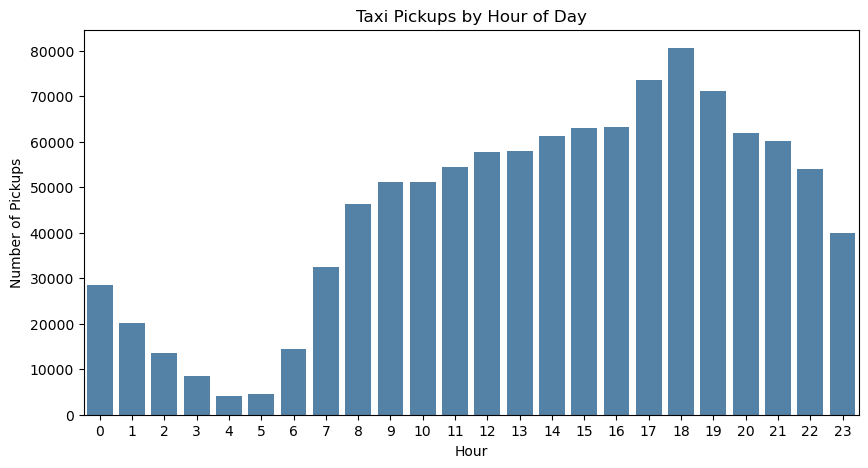

In [69]:
# Find and show the hourly trends in taxi pickups

import matplotlib.pyplot as plt
import seaborn as sns

# Create pickup_hour column
if "pickup_hour" not in hourly_sampled_df.columns:
    hourly_sampled_df["pickup_hour"] = hourly_sampled_df["tpep_pickup_datetime"].dt.hour

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x="pickup_hour", data=hourly_sampled_df, color="steelblue")
plt.title("Taxi Pickups by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.show()

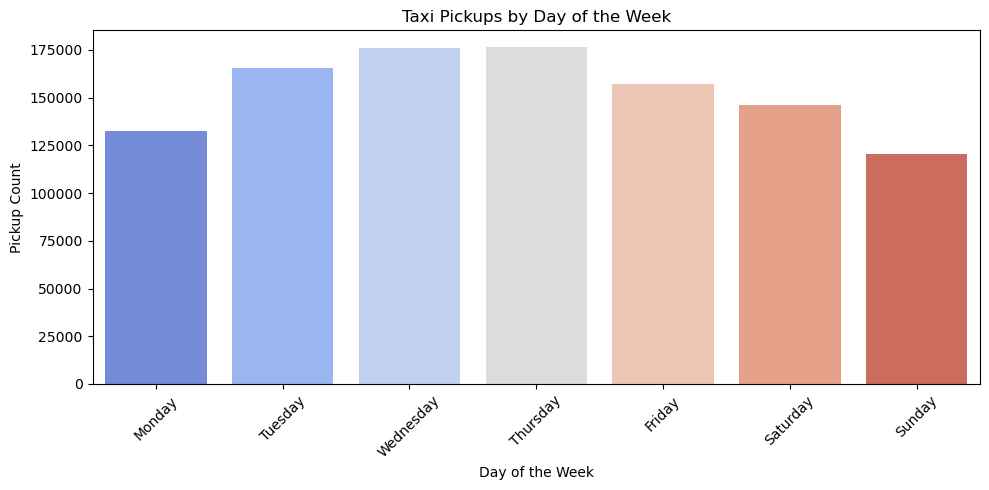

In [71]:
# Find and show the daily trends in taxi pickups (days of the week)

import matplotlib.pyplot as plt
import seaborn as sns

# Create pickup_day column if not present
if "pickup_day" not in hourly_sampled_df.columns:
    hourly_sampled_df["pickup_day"] = hourly_sampled_df["tpep_pickup_datetime"].dt.day_name()

# Plot daily trends
plt.figure(figsize=(10, 5))
sns.countplot(
    x="pickup_day",
    data=hourly_sampled_df,
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    palette="coolwarm"
)
plt.title("Taxi Pickups by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Pickup Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


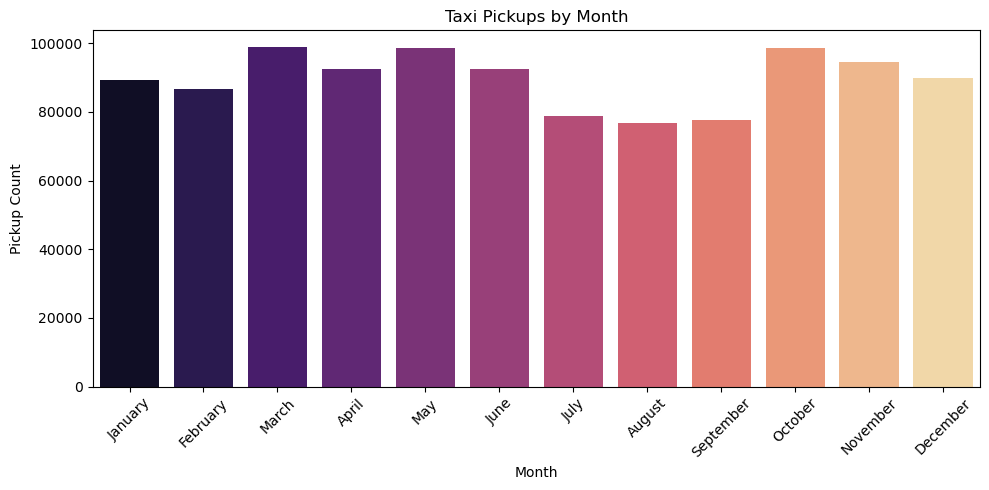

In [74]:
# Show the monthly trends in pickups

import matplotlib.pyplot as plt
import seaborn as sns

# Create pickup_month column if not already present
if "pickup_month" not in hourly_sampled_df.columns:
    hourly_sampled_df["pickup_month"] = hourly_sampled_df["tpep_pickup_datetime"].dt.month_name()

# Plot monthly trends
plt.figure(figsize=(10, 5))
sns.countplot(
    x="pickup_month",
    data=hourly_sampled_df,
    order=[
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ],
    palette="magma"
)
plt.title("Taxi Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Pickup Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Number of Zero or Negative Values in Each Parameter:
fare_amount          2
tip_amount       36070
total_amount         0
trip_distance     3051
dtype: int64


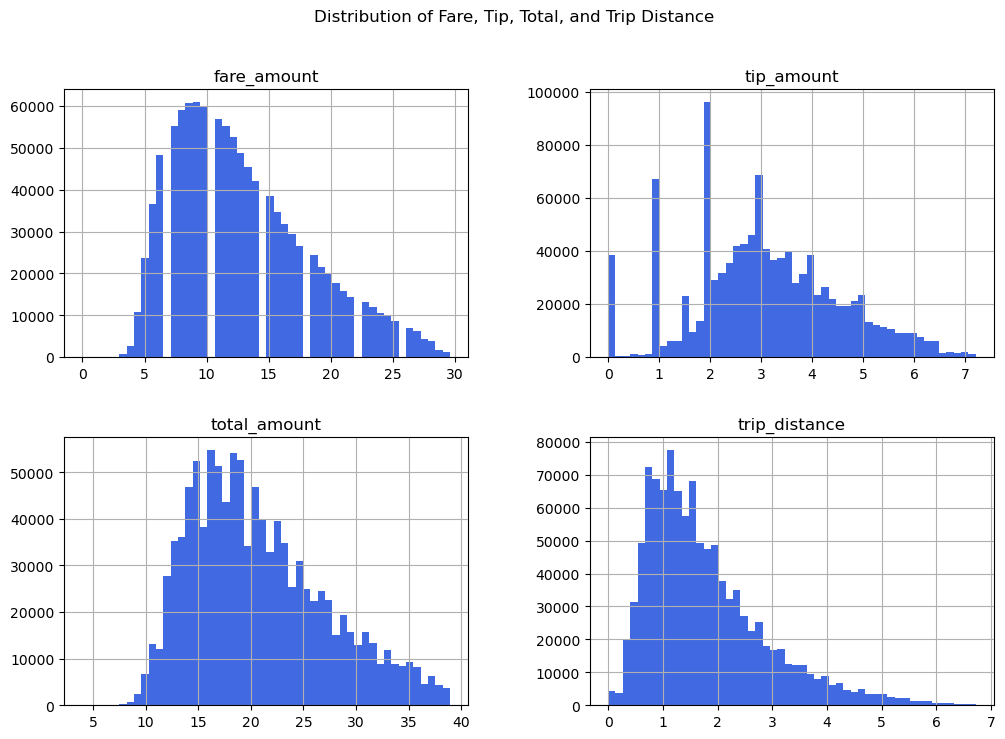

In [75]:
# Analyse the above parameters

financial_cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero or negative values in each column
zero_neg_counts = (hourly_sampled_df[financial_cols] <= 0).sum()

print("Number of Zero or Negative Values in Each Parameter:")
print(zero_neg_counts)

# Plot histograms for each financial parameter
hourly_sampled_df[financial_cols].hist(
    bins=50, figsize=(12, 8), layout=(2, 2), color="royalblue"
)
plt.suptitle("Distribution of Fare, Tip, Total, and Trip Distance")
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [76]:
# Create a df with non zero entries for the selected parameters.

# Filter the DataFrame to only include records with all financial values greater than zero

columns_to_keep = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

filtered_data = hourly_sampled_df[(hourly_sampled_df[columns_to_keep] > 0).all(axis=1)].copy()

print(f"Shape after zero-value filtering: {filtered_data.shape}")
print("Statistics of financial columns after filtering:\n", filtered_data[columns_to_keep].describe())

Shape after zero-value filtering: (1035088, 18)
Statistics of financial columns after filtering:
         fare_amount    tip_amount  total_amount  trip_distance
count  1.035088e+06  1.035088e+06  1.035088e+06   1.035088e+06
mean   1.286094e+01  3.188257e+00  2.083078e+01   1.781554e+00
std    5.423234e+00  1.340285e+00  6.426143e+00   1.076067e+00
min    2.800000e+00  1.000000e-02  7.020000e+00   1.000000e-02
25%    8.600000e+00  2.160000e+00  1.595000e+01   1.000000e+00
50%    1.210000e+01  3.000000e+00  1.968000e+01   1.510000e+00
75%    1.630000e+01  4.020000e+00  2.484000e+01   2.300000e+00
max    2.960000e+01  7.210000e+00  3.894000e+01   6.720000e+00


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

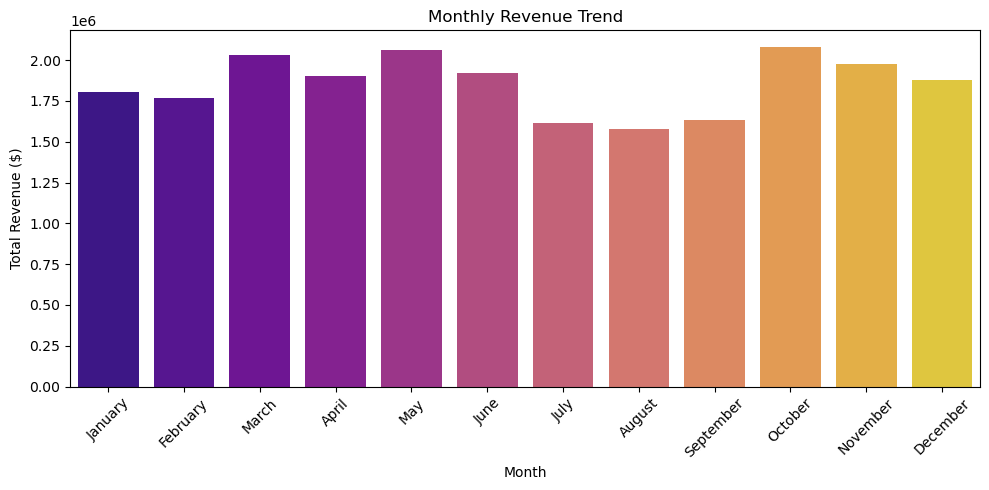

Monthly Revenue Breakdown:
 pickup_month
January      1805434.89
February     1765421.00
March        2030883.24
April        1905727.95
May          2064690.39
June         1921023.51
July         1617824.11
August       1577684.96
September    1636259.24
October      2078892.84
November     1978658.01
December     1875950.26
Name: total_amount, dtype: float64


In [78]:
# Group data by month and analyse monthly revenue

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure pickup_month column exists
if "pickup_month" not in hourly_sampled_df.columns:
    hourly_sampled_df["pickup_month"] = hourly_sampled_df["tpep_pickup_datetime"].dt.month_name()

# Define month order for consistent plotting
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Calculate total monthly revenue
monthly_revenue = (
    hourly_sampled_df.groupby("pickup_month")["total_amount"]
    .sum()
    .reindex(month_order)
)

# Plot monthly revenue trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="plasma")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print revenue breakdown
print("Monthly Revenue Breakdown:\n", monthly_revenue)

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Revenue share by quarter (%):
 quarter
2022Q4     0.00
2023Q1    25.23
2023Q2    26.47
2023Q3    21.62
2023Q4    26.68
Freq: Q-DEC, Name: total_amount, dtype: float64


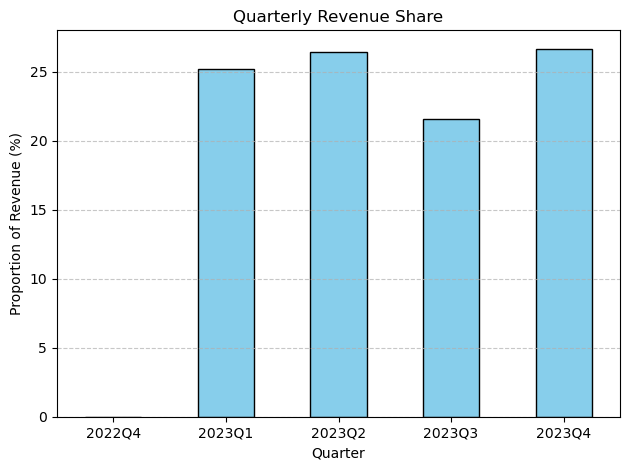

In [79]:
# Calculate proportion of each quarter

# Assign each record to a quarter
filtered_data["quarter"] = filtered_data["tpep_pickup_datetime"].dt.to_period("Q")

# Aggregate revenue by quarter
quarter_revenue = filtered_data.groupby("quarter")["total_amount"].sum()

# Calculate each quarter's percentage of annual revenue
quarter_proportion = (quarter_revenue / quarter_revenue.sum()) * 100

print("Revenue share by quarter (%):\n", quarter_proportion.round(2))

# Plot the proportion as a bar chart
quarter_proportion.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Revenue (%)")
plt.title("Quarterly Revenue Share")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

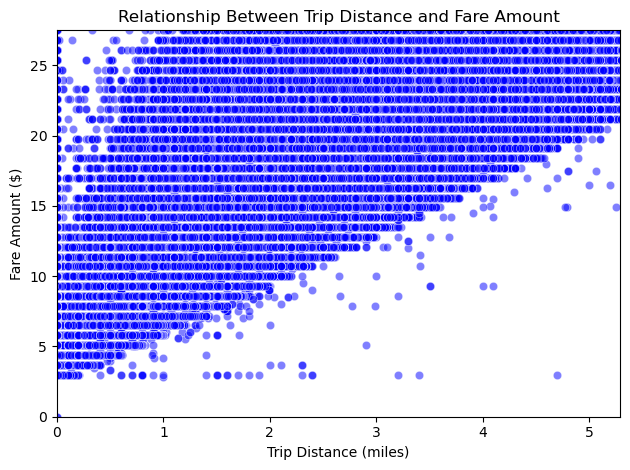

Correlation between Trip Distance and Fare Amount: 0.87


In [81]:
# Show how trip fare is affected by distance
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
trip_distance = hourly_sampled_df["trip_distance"]
fare_amount = hourly_sampled_df["fare_amount"]

# Scatter plot: Trip Distance vs Fare Amount
sns.scatterplot(x=trip_distance, y=fare_amount, alpha=0.5, color="blue")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")

# Limit axes to remove extreme outliers (99th percentile cutoff)
plt.ylim(0, fare_amount.quantile(0.99))
plt.xlim(0, trip_distance.quantile(0.99))

plt.tight_layout()
plt.show()

# Calculate and print correlation
correlation = trip_distance.corr(fare_amount)
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

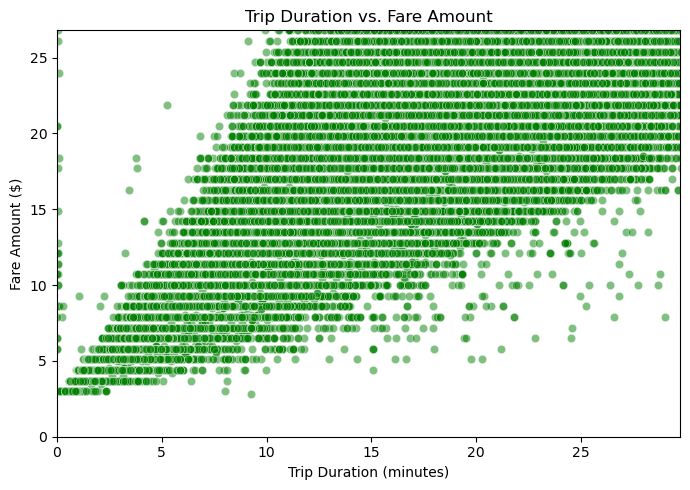

Correlation between trip duration and fare amount: 0.20


In [82]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
filtered_data["trip_duration"] = (
    filtered_data["tpep_dropoff_datetime"] - filtered_data["tpep_pickup_datetime"]
).dt.total_seconds() / 60

# Scatter plot: trip duration vs fare amount (with outlier limits)
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x="trip_duration",
    y="fare_amount",
    data=filtered_data,
    alpha=0.5,
    color="green"
)
plt.title("Trip Duration vs. Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, filtered_data["fare_amount"].quantile(0.99))
plt.xlim(0, filtered_data["trip_duration"].quantile(0.99))
plt.tight_layout()
plt.show()

# Calculate and print correlation
corr_duration_fare = filtered_data["trip_duration"].corr(filtered_data["fare_amount"])
print(f"Correlation between trip duration and fare amount: {corr_duration_fare:.2f}")

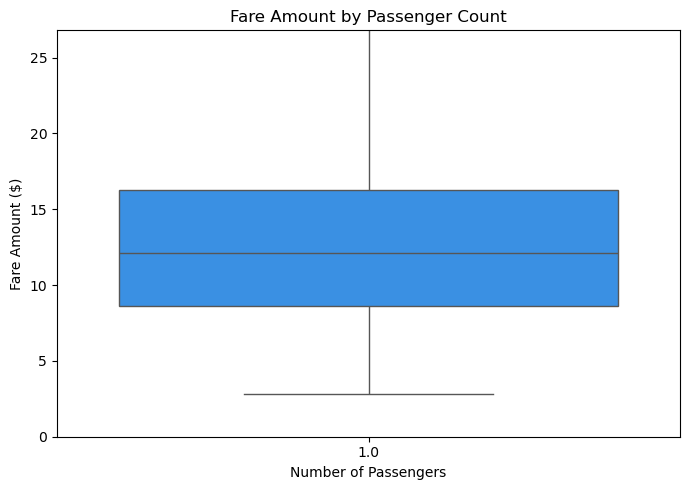

Average Fare Amount by Number of Passengers:
    passenger_count  fare_amount
0              1.0    12.860944


In [83]:
# Show relationship between fare and number of passengers

# Relationship between fare and passenger count

plt.figure(figsize=(7, 5))
sns.boxplot(
    x="passenger_count",
    y="fare_amount",
    data=filtered_data,
    color="dodgerblue"  # Use a single color for no warning
)
plt.title("Fare Amount by Passenger Count")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, filtered_data["fare_amount"].quantile(0.99))
plt.tight_layout()
plt.show()

# Calculate mean fare for each passenger group
fare_by_passenger = (
    filtered_data.groupby("passenger_count")["fare_amount"].mean().reset_index()
)
print("Average Fare Amount by Number of Passengers:\n", fare_by_passenger)

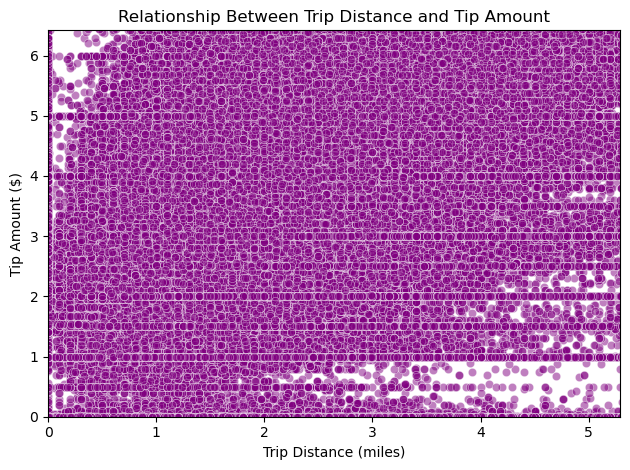

Correlation between Trip Distance and Tip Amount: 0.48

Average Tip Per Mile:
 count    1.073899e+06
mean              inf
std               NaN
min      0.000000e+00
25%      1.371795e+00
50%      1.969388e+00
75%      2.729560e+00
max               inf
Name: tip_per_mile, dtype: float64


In [84]:
# Show relationship between tip and trip distance

# Extract relevant columns
trip_distance = hourly_sampled_df["trip_distance"]
tip_amount = hourly_sampled_df["tip_amount"]

# Scatter plot: Trip Distance vs Tip Amount
sns.scatterplot(x=trip_distance, y=tip_amount, alpha=0.5, color="purple")
plt.title("Relationship Between Trip Distance and Tip Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")

# Limit axes to exclude extreme outliers (99th percentile cutoff)
plt.ylim(0, tip_amount.quantile(0.99))
plt.xlim(0, trip_distance.quantile(0.99))

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = trip_distance.corr(tip_amount)
print(f"Correlation between Trip Distance and Tip Amount: {correlation:.2f}")

# Calculate average tip per mile
hourly_sampled_df["tip_per_mile"] = tip_amount / trip_distance
print("\nAverage Tip Per Mile:\n", hourly_sampled_df["tip_per_mile"].describe())

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [86]:
# Analyse the distribution of different payment types (payment_type).


payment_counts = hourly_sampled_df["payment_type"].value_counts()

# Display counts
print(payment_counts)

payment_type
1    1074054
Name: count, dtype: int64


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [87]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [88]:
# import geopandas as gpd
# Read the shapefile using geopandas
import geopandas as gpd

# Define path to the shapefile (update if needed)
shapefile_path = r"C:\Users\prash\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp"

# Load shapefile
zones = gpd.read_file(shapefile_path)

# Display first few rows
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

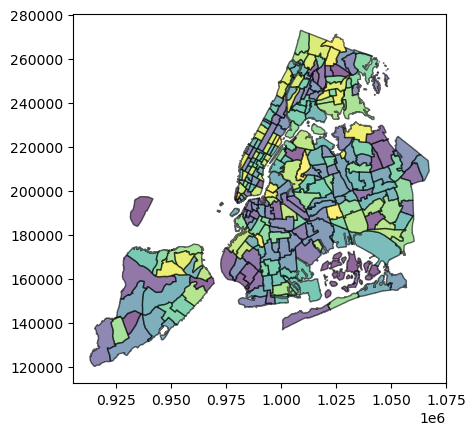

In [89]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot(edgecolor="black", cmap="viridis", alpha=0.6)

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [90]:
# Merge zones and trip records using locationID and PULocationID

zones["LocationID"] = zones["LocationID"].astype(int)
hourly_sampled_df["PULocationID"] = hourly_sampled_df["PULocationID"].astype(int)

# Merge trip records with zone data
merged_df = hourly_sampled_df.merge(
    zones,
    left_on="PULocationID",
    right_on="LocationID",
    how="left"
)

# Display merged DataFrame
print(merged_df)


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
1               1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
2               2  2023-01-03 19:52:03   2023-01-03 19:55:24              1.0   
3               2  2023-01-15 15:41:41   2023-01-15 15:54:03              1.0   
4               2  2023-01-11 09:40:24   2023-01-11 09:54:18              1.0   
...           ...                  ...                   ...              ...   
1074049         2  2023-02-09 22:32:32   2023-02-09 22:53:32              1.0   
1074050         2  2023-05-12 13:55:10   2023-05-12 14:02:10              1.0   
1074051         1  2023-01-23 07:04:11   2023-01-23 07:08:24              1.0   
1074052         2  2023-05-09 20:10:39   2023-05-09 20:31:23              1.0   
1074053         2  2023-01-07 19:41:20   2023-01-07 19:53:44              1.0   

         trip_distance  Rat

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

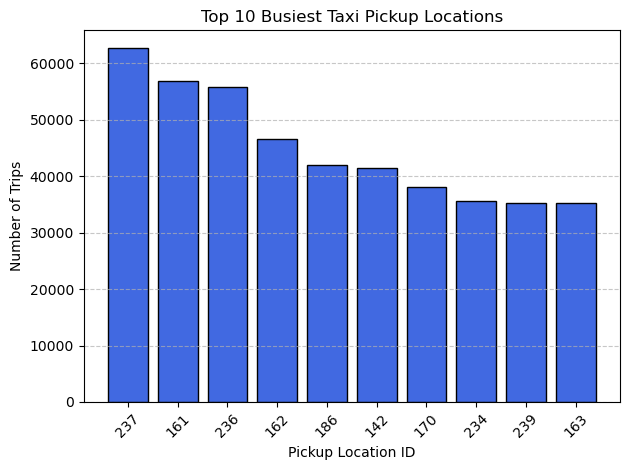

In [91]:
# Group data by location and calculate the number of trips
import geopandas as gpd
import matplotlib.pyplot as plt

# Load taxi zones shapefile
shapefile_path = r"C:\Users\prash\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp"
zones = gpd.read_file(shapefile_path)

# Count number of trips per pickup location
trip_counts = (
    hourly_sampled_df.groupby("PULocationID")
    .size()
    .reset_index(name="num_trips")
    .sort_values(by="num_trips", ascending=False)
)

# Merge trip counts with zone data
zones = zones.merge(
    trip_counts,
    left_on="LocationID",
    right_on="PULocationID",
    how="left"
)

# Replace NaN with 0 for zones with no trips
zones["num_trips"] = zones["num_trips"].fillna(0)

# Plot top 10 busiest pickup locations
top_pickups = trip_counts.head(10)

plt.bar(
    top_pickups["PULocationID"].astype(str),
    top_pickups["num_trips"],
    color="royalblue",
    edgecolor="black"
)
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Busiest Taxi Pickup Locations")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

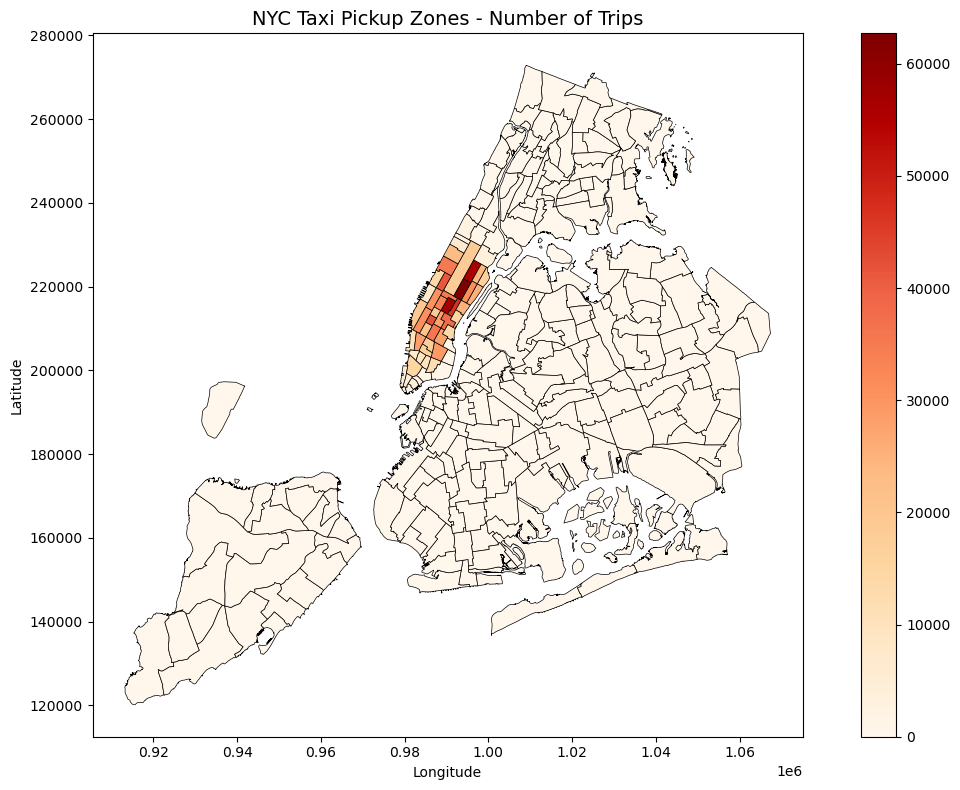

In [92]:
# Merge trip counts back to the zones GeoDataFrame

# Read the shapefile
shapefile_path = r"C:\Users\prash\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp"
zones = gpd.read_file(shapefile_path)

# Aggregate trip counts by pickup location
trip_counts = (
    hourly_sampled_df.groupby("PULocationID")
    .size()
    .reset_index(name="num_trips")
)

# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 (for zones with no recorded trips)
zones["num_trips"] = zones["num_trips"].fillna(0)

# Plot the taxi zones with trip density
fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(column="num_trips", cmap="OrRd", linewidth=0.5, edgecolor="black", legend=True, ax=ax)
plt.title("NYC Taxi Pickup Zones - Number of Trips", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

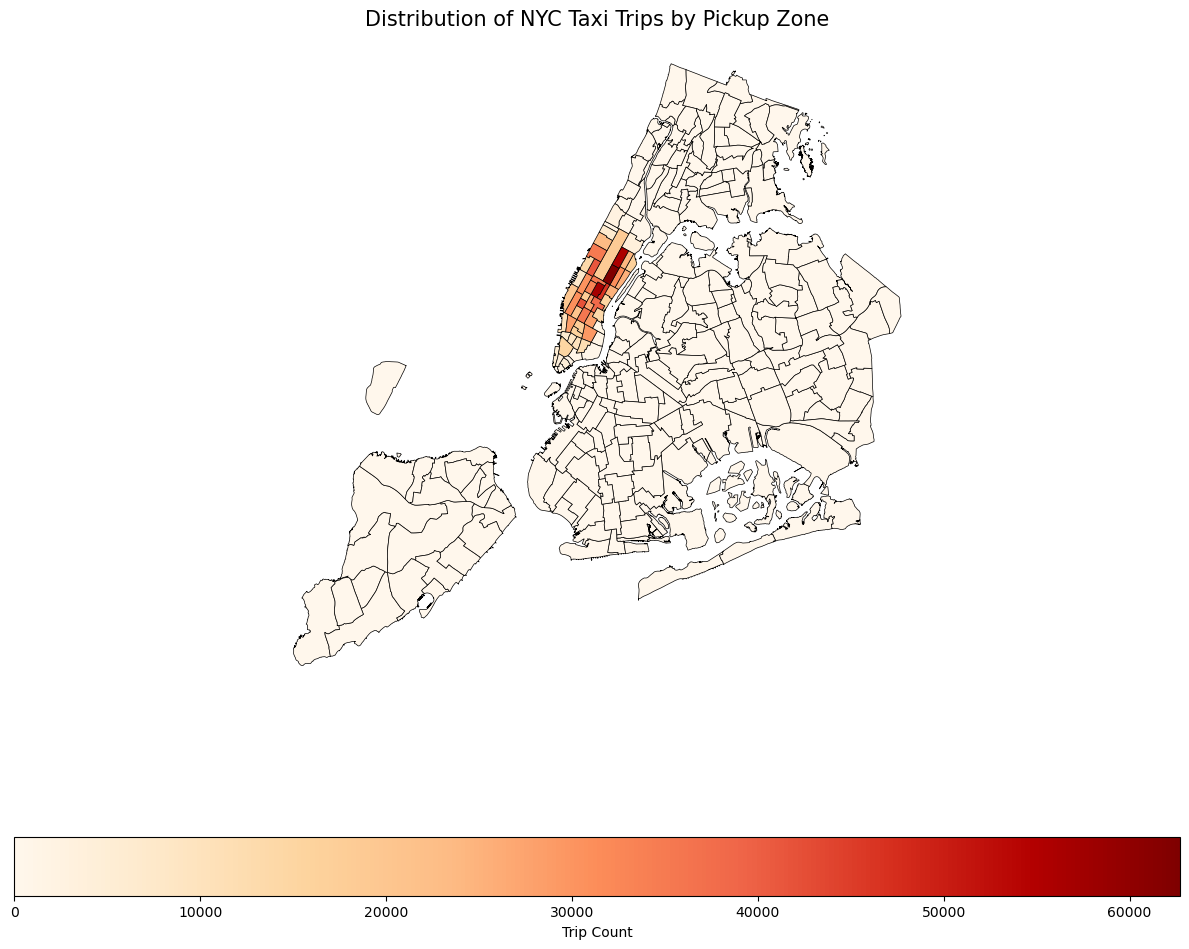

In [93]:
# Define figure and axis

fig, ax = plt.subplots(figsize=(12, 10))

# Draw the taxi zones, shading by trip counts
zones.plot(
    column="num_trips",                 # data column for color intensity
    cmap="OrRd",                         # color scheme (Orange → Red)
    linewidth=0.5,                       # boundary line width
    edgecolor="black",                   # boundary line color
    ax=ax,                               # use our axis
    legend=True,                         # include color legend
    legend_kwds={
        "label": "Trip Count",
        "orientation": "horizontal"
    }
)

# Add a descriptive title
ax.set_title("Distribution of NYC Taxi Trips by Pickup Zone", fontsize=15)

# Hide axis ticks and borders for a cleaner map look
ax.set_xticks([])
ax.set_yticks([])
ax.spines.clear()

# Render the final map
plt.tight_layout()
plt.show()




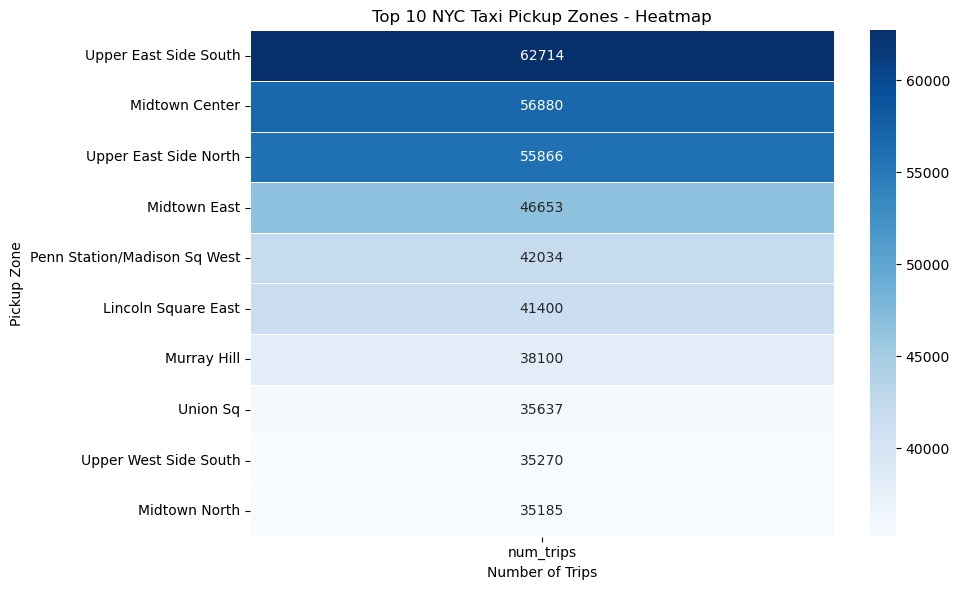

In [94]:
# can you try displaying the zones DF sorted by the number of trips?
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Grab the 10 busiest pickup zones
top10 = zones.nlargest(10, "num_trips").copy()

# Prepare a single-column table for the heatmap
heat_df = (
    top10[["zone", "num_trips"]]
    .set_index("zone")
    .sort_values("num_trips", ascending=False)
)

# Draw heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_df,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    fmt=".0f"
)

# Titles and labels
plt.title("Top 10 NYC Taxi Pickup Zones - Heatmap")
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")

plt.tight_layout()
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

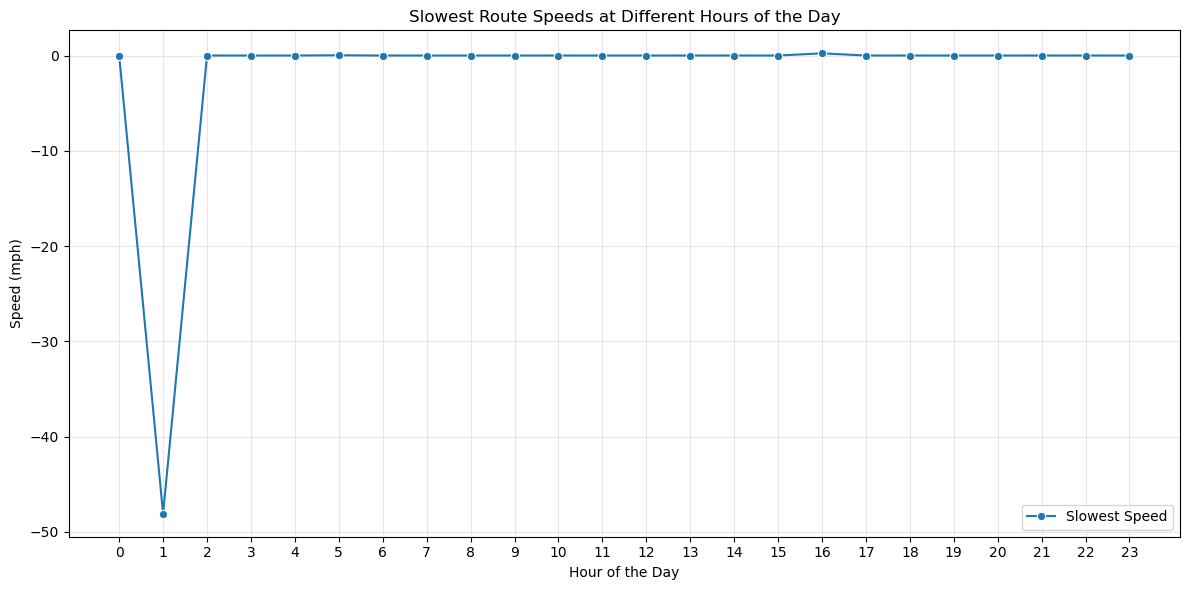

Rows in slowest_routes: 24
   pickup_hour  PULocationID  DOLocationID  avg_duration  avg_distance  \
0            0           202           112     12.233333      0.000000   
1            1           164           224     -1.819444      1.458333   
2            2           125           125      1.466667      0.000000   
3            3            13            13      0.116667      0.000000   
4            4            79            41     17.700000      0.000000   

   speed_mph  
0   0.000000  
1 -48.091603  
2   0.000000  
3   0.000000  
4   0.000000  


In [108]:
# Find routes which have the slowest speeds at different times of the day
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1) Use the same DataFrame every time ----
# If df already exists and is your working frame, clone it to avoid earlier edits affecting results.
df_run = df.copy(deep=True)

# If you prefer to reload fresh from disk each time (more reproducible), do this instead:
# df_run = pd.read_parquet(r"C:\path\to\your\exact\file.parquet")

# ---- 2) Build features EXACTLY (no filtering) ----
df_run["tpep_pickup_datetime"]  = pd.to_datetime(df_run["tpep_pickup_datetime"],  errors="coerce")
df_run["tpep_dropoff_datetime"] = pd.to_datetime(df_run["tpep_dropoff_datetime"], errors="coerce")

# trip_duration in minutes (same definition)
if "trip_duration" not in df_run.columns:
    df_run["trip_duration"] = (df_run["tpep_dropoff_datetime"] - df_run["tpep_pickup_datetime"]).dt.total_seconds() / 60

# pickup hour
df_run["pickup_hour"] = df_run["tpep_pickup_datetime"].dt.hour

# ---- 3) Your original pipeline preserved ----
route_stats = (
    df_run.groupby(["PULocationID", "DOLocationID", "pickup_hour"])
          .agg(
              avg_duration=("trip_duration", "mean"),
              avg_distance=("trip_distance", "mean")
          )
          .reset_index()
)

# avoid division-by-zero breaking the plot (keeps rows but drops only zero-duration means)
route_stats = route_stats[route_stats["avg_duration"] != 0].copy()

route_stats["speed_mph"] = route_stats["avg_distance"] / (route_stats["avg_duration"] / 60)

# EXACT: sort -> groupby("pickup_hour").first()
# (Stable sort; we add minor tie-breakers that DO NOT change order when speed_mph differs,
#  but make ties deterministic across runs.)
route_stats = route_stats.sort_values(
    by=["pickup_hour", "speed_mph", "avg_duration", "PULocationID", "DOLocationID"],
    kind="mergesort"  # explicitly stable
)

slowest_routes = (
    route_stats.groupby("pickup_hour", as_index=False)
               .first()
               .sort_values("pickup_hour")
)

# ---- 4) Plot ----
plt.figure(figsize=(12, 6))
sns.lineplot(data=slowest_routes, x="pickup_hour", y="speed_mph", marker="o", label="Slowest Speed")
plt.xlabel("Hour of the Day")
plt.ylabel("Speed (mph)")
plt.title("Slowest Route Speeds at Different Hours of the Day")
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend()
plt.show()

# Optional: quick check so you can compare runs
print("Rows in slowest_routes:", len(slowest_routes))
print(slowest_routes.head(5))


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

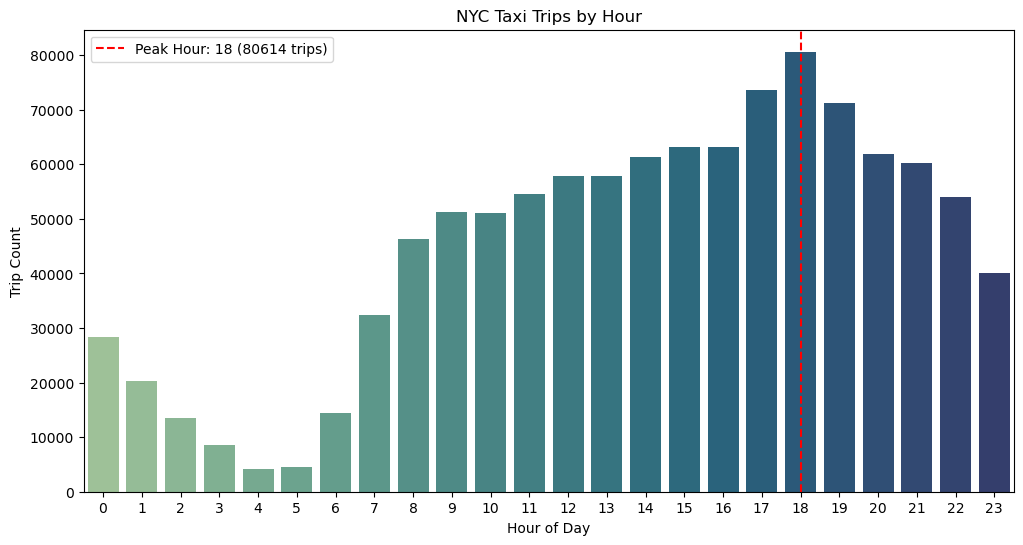

Peak hour is 18:00 with 80614 trips.


In [109]:
# Visualise the number of trips per hour and find the busiest hour

# Pull the pickup hour from pickup timestamp
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce").dt.hour

# Count trips for each hour
trips_by_hour = df["pickup_hour"].value_counts().sort_index()

# Identify the peak hour and its trip count
peak_hour = trips_by_hour.idxmax()
peak_trips = trips_by_hour.max()

# Bar plot of hourly trips
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_by_hour.index, y=trips_by_hour.values, palette="crest")

# Add chart labels and title
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.title("NYC Taxi Trips by Hour")
plt.xticks(range(24))

# Mark the peak hour on the chart
plt.axvline(x=peak_hour, color="red", linestyle="--",
            label=f"Peak Hour: {peak_hour} ({peak_trips} trips)")
plt.legend()

# Show the chart
plt.show()

# Display busiest hour in text
print(f"Peak hour is {peak_hour}:00 with {peak_trips} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Estimated total trips in the five busiest hours:
18:00  ->  806,140 trips
17:00  ->  736,520 trips
19:00  ->  711,430 trips
16:00  ->  632,060 trips
15:00  ->  631,440 trips


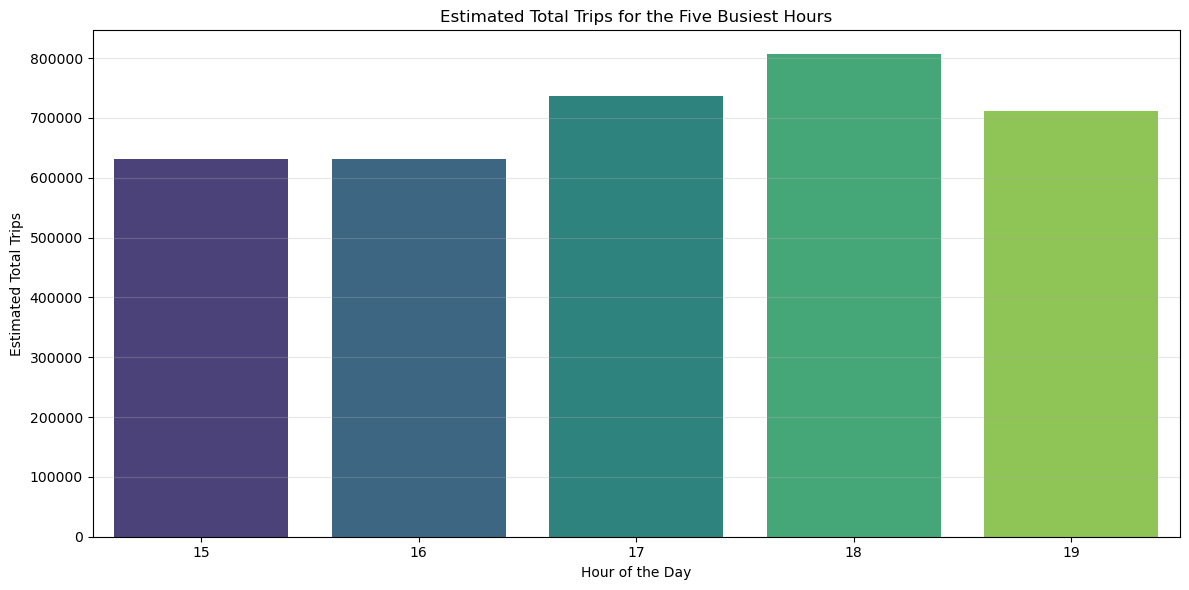

In [110]:
# Scale up the number of trips
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Hour feature
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# 2) Count trips per hour in the sampled data
trips_per_hour = df["pickup_hour"].value_counts().sort_index()

# 3) Scale up to estimate totals (set your actual sampling fraction)
sample_fraction = 0.10  # e.g., 10% sample -> multiply by 10
scaled_trips = (trips_per_hour / sample_fraction).round().astype(int)

# 4) Top-5 busiest hours (actual estimated counts)
top5 = scaled_trips.sort_values(ascending=False).head(5)

# 5) Show results
print("Estimated total trips in the five busiest hours:")
for hr, cnt in top5.items():
    print(f"{hr:02d}:00  ->  {cnt:,} trips")

# 6) Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=top5.index, y=top5.values, palette="viridis")
plt.title("Estimated Total Trips for the Five Busiest Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Total Trips")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

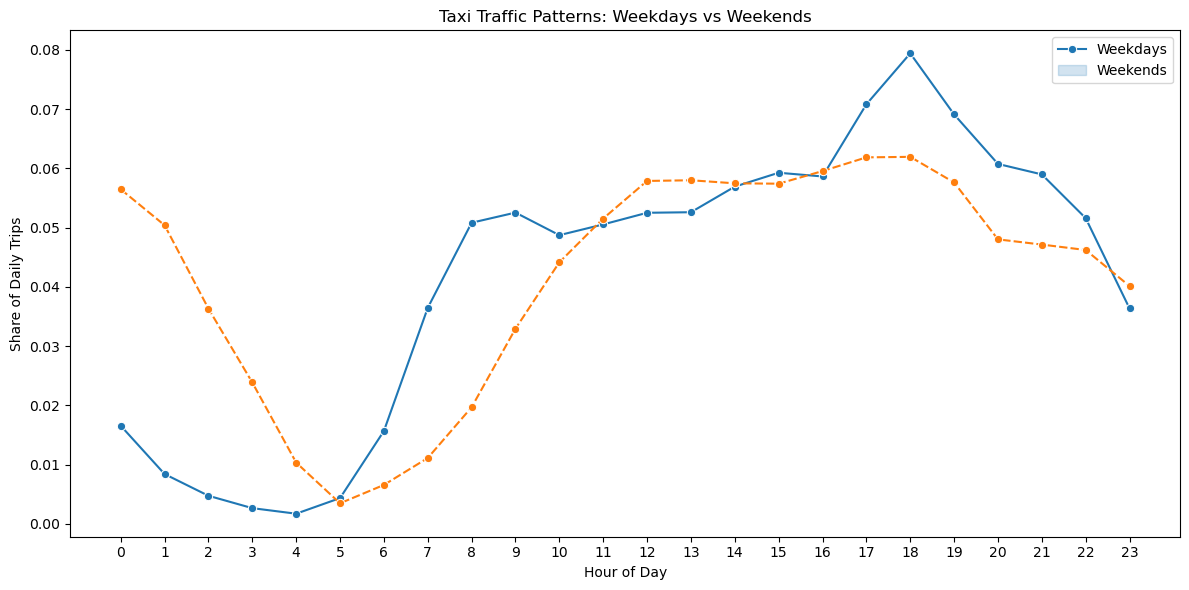

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create hour and weekday columns
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["day_of_week"] = df["tpep_pickup_datetime"].dt.weekday  # Monday=0, Sunday=6

# Tag weekend trips
df["weekend_flag"] = df["day_of_week"] >= 5

# Count trips per hour for weekday/weekend
traffic_counts = (
    df.groupby(["pickup_hour", "weekend_flag"])
      .size()
      .reset_index(name="trip_count")
)

# Reshape for easier plotting
traffic_pivot = traffic_counts.pivot(index="pickup_hour", columns="weekend_flag", values="trip_count")

# Rename columns for clarity
traffic_pivot.columns = ["Weekdays", "Weekends"]

# Convert to proportions for fair comparison
traffic_pivot = traffic_pivot.div(traffic_pivot.sum())

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_pivot, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Share of Daily Trips")
plt.title("Taxi Traffic Patterns: Weekdays vs Weekends")
plt.xticks(range(24))
plt.legend(["Weekdays", "Weekends"])
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Identifying the busiest and quietest hours for each day is useful because it enables better resource planning. Operators can schedule more drivers and vehicles during busy hours to reduce passenger wait times and maximize earnings, while reducing operations or scheduling maintenance during quiet hours to save costs. It also supports revenue optimization through surge pricing in high-demand periods and improves customer satisfaction by managing availability and travel times more effectively.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

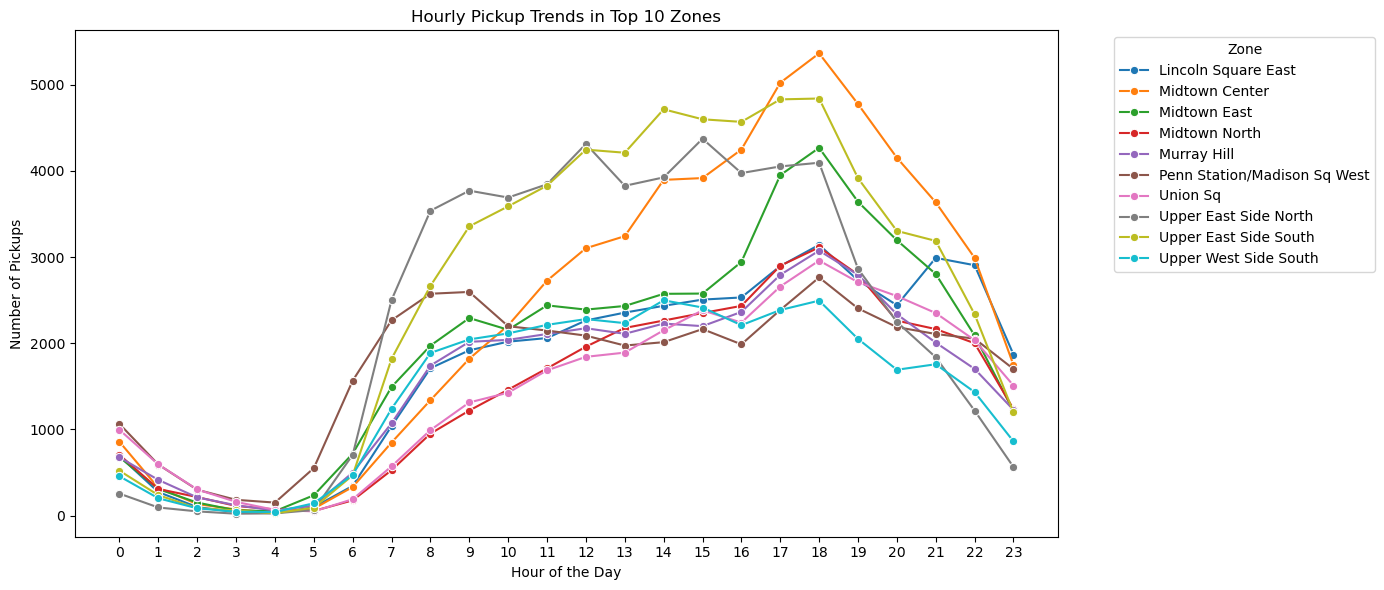

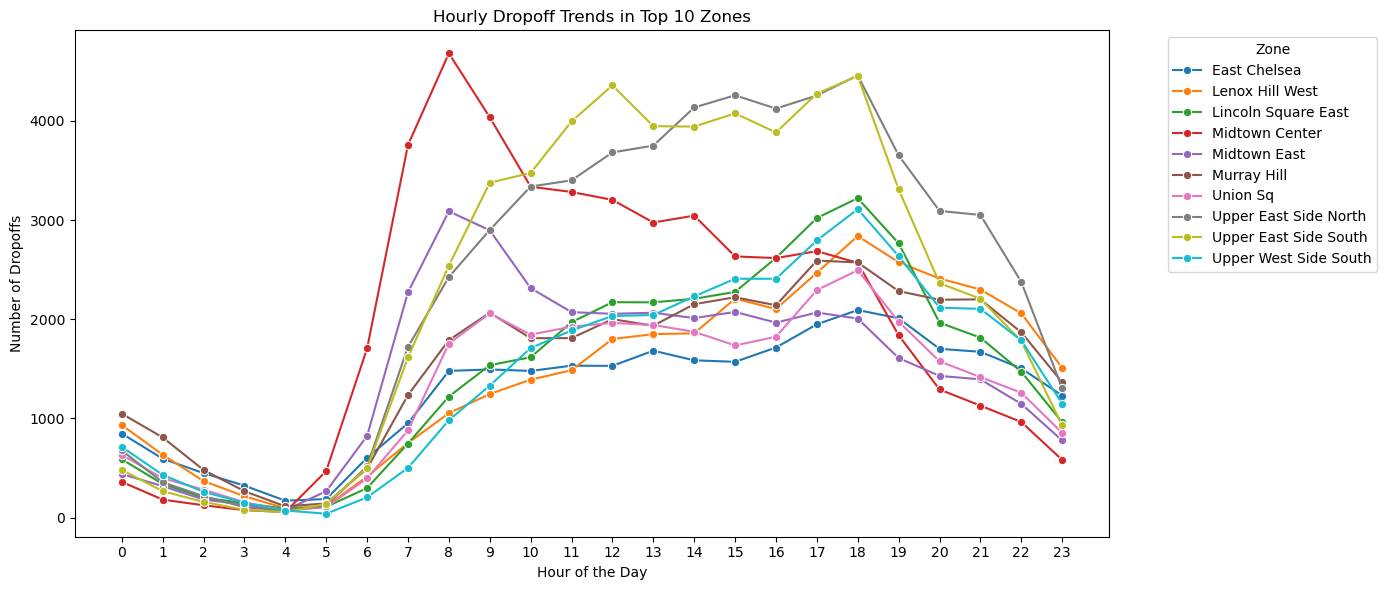

In [112]:
# Find top 10 pickup and dropoff zones


import matplotlib.pyplot as plt

# Ensure datetime is parsed
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# ---- Top 10 pickup zones ----
pickup_counts = df["PULocationID"].value_counts().head(10).index
top_pickup_df = df[df["PULocationID"].isin(pickup_counts)]

# ---- Top 10 dropoff zones ----
dropoff_counts = df["DOLocationID"].value_counts().head(10).index
top_dropoff_df = df[df["DOLocationID"].isin(dropoff_counts)]

# ---- Merge zone names ----
top_pickup_df = top_pickup_df.merge(zones[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID", how="left")
top_dropoff_df = top_dropoff_df.merge(zones[["LocationID", "zone"]], left_on="DOLocationID", right_on="LocationID", how="left")

# ---- Hourly pickup trends for top zones ----
pickup_trends = (
    top_pickup_df.groupby(["pickup_hour", "zone"])
    .size()
    .reset_index(name="trip_count")
)

plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_trends, x="pickup_hour", y="trip_count", hue="zone", marker="o")
plt.title("Hourly Pickup Trends in Top 10 Zones")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ---- Hourly dropoff trends for top zones ----
dropoff_trends = (
    top_dropoff_df.groupby([top_dropoff_df["tpep_pickup_datetime"].dt.hour, "zone"])
    .size()
    .reset_index(name="trip_count")
    .rename(columns={"tpep_pickup_datetime": "pickup_hour"})
)

plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_trends, x="pickup_hour", y="trip_count", hue="zone", marker="o")
plt.title("Hourly Dropoff Trends in Top 10 Zones")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Dropoffs")
plt.xticks(range(24))
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [113]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
import numpy as np
import pandas as pd

# Count pickup and dropoff trips per LocationID
pu = df["PULocationID"].value_counts().rename("num_pickups")
do = df["DOLocationID"].value_counts().rename("num_dropoffs")

# Combine on the full set of LocationIDs (pickups ∪ dropoffs)
ratios = (
    pd.concat([pu, do], axis=1)
      .fillna(0)
      .reset_index()
      .rename(columns={"index": "LocationID"})
)

# Safe ratio: undefined when dropoffs = 0
ratios["pickup_dropoff_ratio"] = ratios["num_pickups"] / ratios["num_dropoffs"].replace(0, np.nan)

# Attach zone names
ratios = ratios.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Drop zones where ratio is undefined (no dropoffs)
ratios_valid = ratios.dropna(subset=["pickup_dropoff_ratio"]).copy()

# Sort for top/bottom 10
top_10 = ratios_valid.sort_values("pickup_dropoff_ratio", ascending=False).head(10)
bottom_10 = ratios_valid.sort_values("pickup_dropoff_ratio", ascending=True).head(10)

# Display (rounded for readability)
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10[["zone", "pickup_dropoff_ratio"]].assign(pickup_dropoff_ratio=lambda s: s["pickup_dropoff_ratio"].round(3)))

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10[["zone", "pickup_dropoff_ratio"]].assign(pickup_dropoff_ratio=lambda s: s["pickup_dropoff_ratio"].round(3)))

Top 10 Pickup/Dropoff Ratios:
                            zone  pickup_dropoff_ratio
77                 East Elmhurst                 6.000
4   Penn Station/Madison Sq West                 1.609
28       Greenwich Village South                 1.362
24                  Central Park                 1.351
3                   Midtown East                 1.315
15                  West Village                 1.305
25              Garment District                 1.284
9                  Midtown North                 1.229
10     Times Sq/Theatre District                 1.202
1                 Midtown Center                 1.195

Bottom 10 Pickup/Dropoff Ratios:
                          zone  pickup_dropoff_ratio
154        Ocean Parkway South                   0.0
153                   Glendale                   0.0
137               Baisley Park                   0.0
112         Stuyvesant Heights                   0.0
113         South Williamsburg                   0.0
114          

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

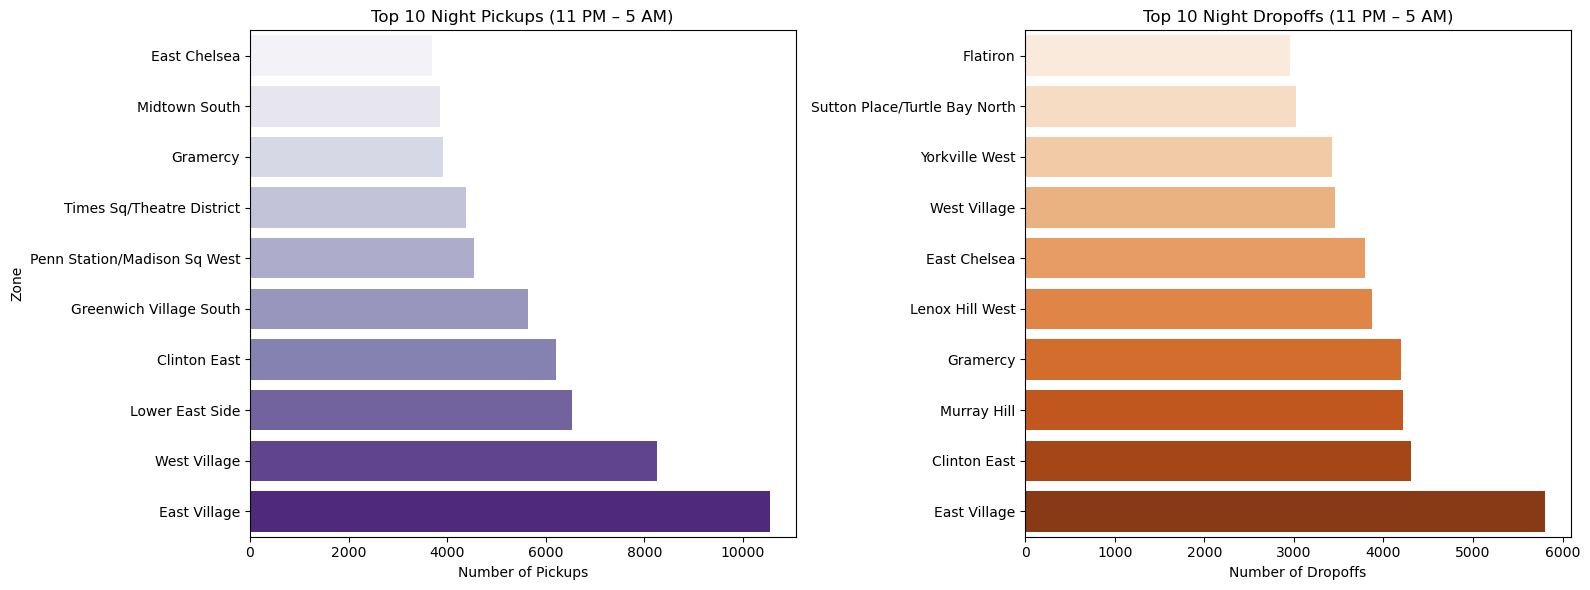

Top 10 night pickup zones:
                        zone  num_pickups
                East Village        10540
                West Village         8264
             Lower East Side         6534
                Clinton East         6213
     Greenwich Village South         5641
Penn Station/Madison Sq West         4548
   Times Sq/Theatre District         4384
                    Gramercy         3910
               Midtown South         3865
                East Chelsea         3691

Top 10 night dropoff zones:
                         zone  num_dropoffs
                 East Village          5802
                 Clinton East          4311
                  Murray Hill          4223
                     Gramercy          4202
              Lenox Hill West          3868
                 East Chelsea          3799
                 West Village          3459
               Yorkville West          3422
Sutton Place/Turtle Bay North          3028
                     Flatiron          295

In [114]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure we have the hour field
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Keep only night trips: 23, 0–5
night_mask = (df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)
night_df = df.loc[night_mask].copy()

# Top 10 night pickups
night_top_pu = (
    night_df["PULocationID"].value_counts().head(10).rename_axis("LocationID").reset_index(name="num_pickups")
    .merge(zones[["LocationID", "zone"]], on="LocationID", how="left")
    .sort_values("num_pickups", ascending=True)  # for a neat horizontal bar order
)

# Top 10 night dropoffs
night_top_do = (
    night_df["DOLocationID"].value_counts().head(10).rename_axis("LocationID").reset_index(name="num_dropoffs")
    .merge(zones[["LocationID", "zone"]], on="LocationID", how="left")
    .sort_values("num_dropoffs", ascending=True)
)

# Plot side-by-side (horizontal bars for readability)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.barplot(data=night_top_pu, x="num_pickups", y="zone", ax=axes[0], palette="Purples")
axes[0].set_title("Top 10 Night Pickups (11 PM – 5 AM)")
axes[0].set_xlabel("Number of Pickups")
axes[0].set_ylabel("Zone")

sns.barplot(data=night_top_do, x="num_dropoffs", y="zone", ax=axes[1], palette="Oranges")
axes[1].set_title("Top 10 Night Dropoffs (11 PM – 5 AM)")
axes[1].set_xlabel("Number of Dropoffs")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

# (Optional) quick text summary
print("Top 10 night pickup zones:")
print(night_top_pu.sort_values("num_pickups", ascending=False)[["zone", "num_pickups"]].to_string(index=False))

print("\nTop 10 night dropoff zones:")
print(night_top_do.sort_values("num_dropoffs", ascending=False)[["zone", "num_dropoffs"]].to_string(index=False))


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [115]:
# Filter for night hours (11 PM to 5 AM)
# Ensure datetime parsing
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Night: 11 PM–5 AM | Day: 6 AM–10 PM
night_mask = (df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)
day_mask = (df["pickup_hour"] > 5) & (df["pickup_hour"] < 23)

# Revenue totals
night_rev = df.loc[night_mask, "total_amount"].sum()
day_rev   = df.loc[day_mask, "total_amount"].sum()
total_rev = night_rev + day_rev

# Revenue share (%)
night_pct = (night_rev / total_rev) * 100
day_pct   = (day_rev / total_rev) * 100

print(f"Night Time Revenue Share : {night_pct:.2f}%")
print(f"Day Time Revenue Share   : {day_pct:.2f}%")

Night Time Revenue Share : 11.20%
Day Time Revenue Share   : 88.80%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [117]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid distances and passenger counts
filtered_df = df[(df["trip_distance"] > 0) & (df["passenger_count"] > 0)].copy()

# Step 1: Compute fare per mile for each trip
filtered_df["fare_per_mile"] = filtered_df["fare_amount"] / filtered_df["trip_distance"]

# Step 2: Adjust for passenger count to get fare per mile per passenger
filtered_df["fare_per_mile_per_passenger"] = filtered_df["fare_per_mile"] / filtered_df["passenger_count"]

# Step 3: Average the results for each passenger count
avg_fare_passenger = (
    filtered_df.groupby("passenger_count")["fare_per_mile_per_passenger"]
    .mean()
    .reset_index()
)

# Display the analysis
print("Average Fare per Mile per Passenger for each Passenger Count:")
print(avg_fare_passenger)


Average Fare per Mile per Passenger for each Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                     8.401935


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

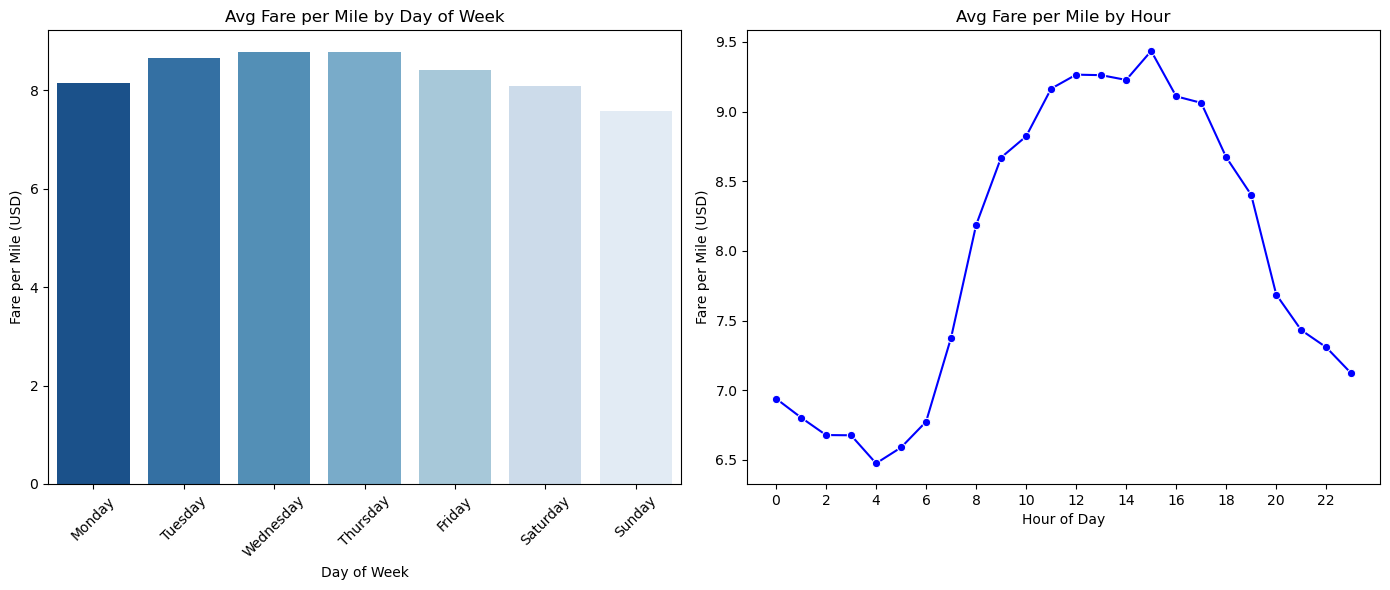

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only trips with valid distance
valid_trips = df[df["trip_distance"] > 0].copy()

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Extract day name and pickup hour
valid_trips["pickup_day"] = pd.to_datetime(valid_trips["tpep_pickup_datetime"]).dt.day_name()
valid_trips["pickup_hour"] = pd.to_datetime(valid_trips["tpep_pickup_datetime"]).dt.hour

# Average fare per mile by day of week
avg_fare_day = (
    valid_trips.groupby("pickup_day")["fare_per_mile"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

# Average fare per mile by hour
avg_fare_hour = valid_trips.groupby("pickup_hour")["fare_per_mile"].mean()

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot by day of week
sns.barplot(ax=axes[0], x=avg_fare_day.index, y=avg_fare_day.values, palette="Blues_r")
axes[0].set_title("Avg Fare per Mile by Day of Week")
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Fare per Mile (USD)")
axes[0].tick_params(axis='x', rotation=45)

# Plot by hour of day
sns.lineplot(ax=axes[1], x=avg_fare_hour.index, y=avg_fare_hour.values, marker="o", color="blue")
axes[1].set_title("Avg Fare per Mile by Hour")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Fare per Mile (USD)")
axes[1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

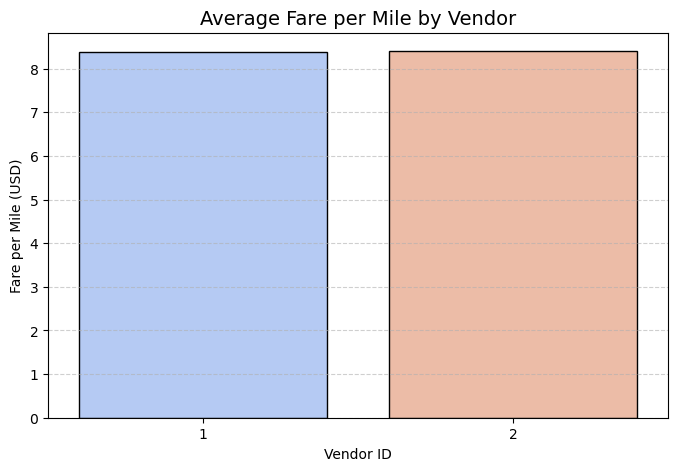

In [119]:
# Compare fare per mile for different vendors

# Ensure trip_distance > 0 to avoid division by zero
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out trips with zero or negative distance
vendor_data = df[df["trip_distance"] > 0].copy()

# Calculate fare per mile
vendor_data["fare_per_mile"] = vendor_data["fare_amount"] / vendor_data["trip_distance"]

# Get average fare per mile for each vendor
avg_fare_vendor = vendor_data.groupby("VendorID")["fare_per_mile"].mean().reset_index()

# Change VendorID to string for categorical plotting
avg_fare_vendor["VendorID"] = avg_fare_vendor["VendorID"].astype(str)

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fare_vendor, x="VendorID", y="fare_per_mile", palette="coolwarm", edgecolor="black")
plt.title("Average Fare per Mile by Vendor", fontsize=14)
plt.xlabel("Vendor ID")
plt.ylabel("Fare per Mile (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


distance_tier  0–2 mi  2–5 mi  5+ mi
VendorID                            
1                9.47    6.33   4.69
2                9.44    6.43   4.74


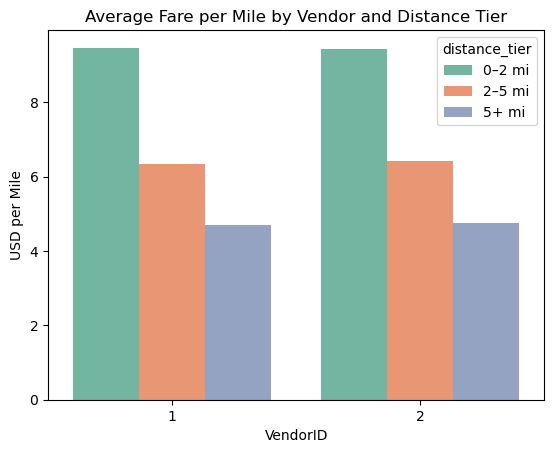

In [120]:
# Defining distance tiers

## Keep valid trips and compute fare per mile
df = df[(df["trip_distance"] > 0) & (df["fare_amount"] > 0)].copy()
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Define tiers: 0–2, 2–5, >5 miles
df["distance_tier"] = pd.cut(df["trip_distance"], [0, 2, 5, float("inf")],
                              labels=["0–2 mi", "2–5 mi", "5+ mi"], right=False)

# Average fare per mile for each Vendor & Tier
result = df.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()

# Show in table form
print(result.pivot(index="VendorID", columns="distance_tier", values="fare_per_mile").round(2))

# Plot grouped bar chart
sns.barplot(data=result, x="VendorID", y="fare_per_mile", hue="distance_tier", palette="Set2")
plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.ylabel("USD per Mile")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

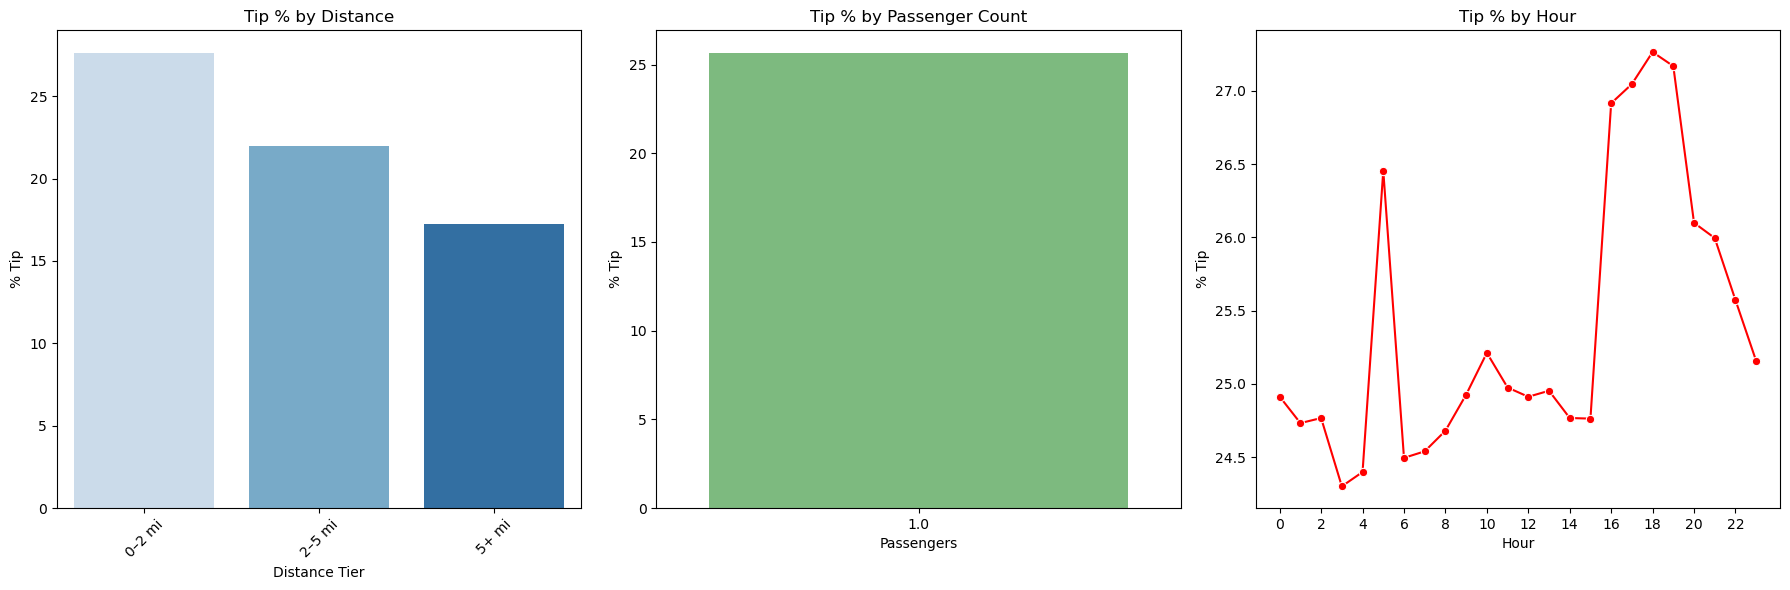

In [121]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Keep only valid fares
df = df[df["fare_amount"] > 0].copy()

# Tip percentage
df["tip_percent"] = (df["tip_amount"] / df["fare_amount"]) * 100
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Group averages
tip_by_distance = df.groupby("distance_tier")["tip_percent"].mean().reset_index()
tip_by_passengers = df.groupby("passenger_count")["tip_percent"].mean().reset_index()
tip_by_hour = df.groupby("pickup_hour")["tip_percent"].mean().reset_index()

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=tip_by_distance, x="distance_tier", y="tip_percent", ax=axs[0], palette="Blues")
axs[0].set(title="Tip % by Distance", xlabel="Distance Tier", ylabel="% Tip")
axs[0].tick_params(axis="x", rotation=45)

sns.barplot(data=tip_by_passengers, x="passenger_count", y="tip_percent", ax=axs[1], palette="Greens")
axs[1].set(title="Tip % by Passenger Count", xlabel="Passengers", ylabel="% Tip")

sns.lineplot(data=tip_by_hour, x="pickup_hour", y="tip_percent", marker="o", ax=axs[2], color="red")
axs[2].set(title="Tip % by Hour", xlabel="Hour", ylabel="% Tip", xticks=range(0, 24, 2))

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

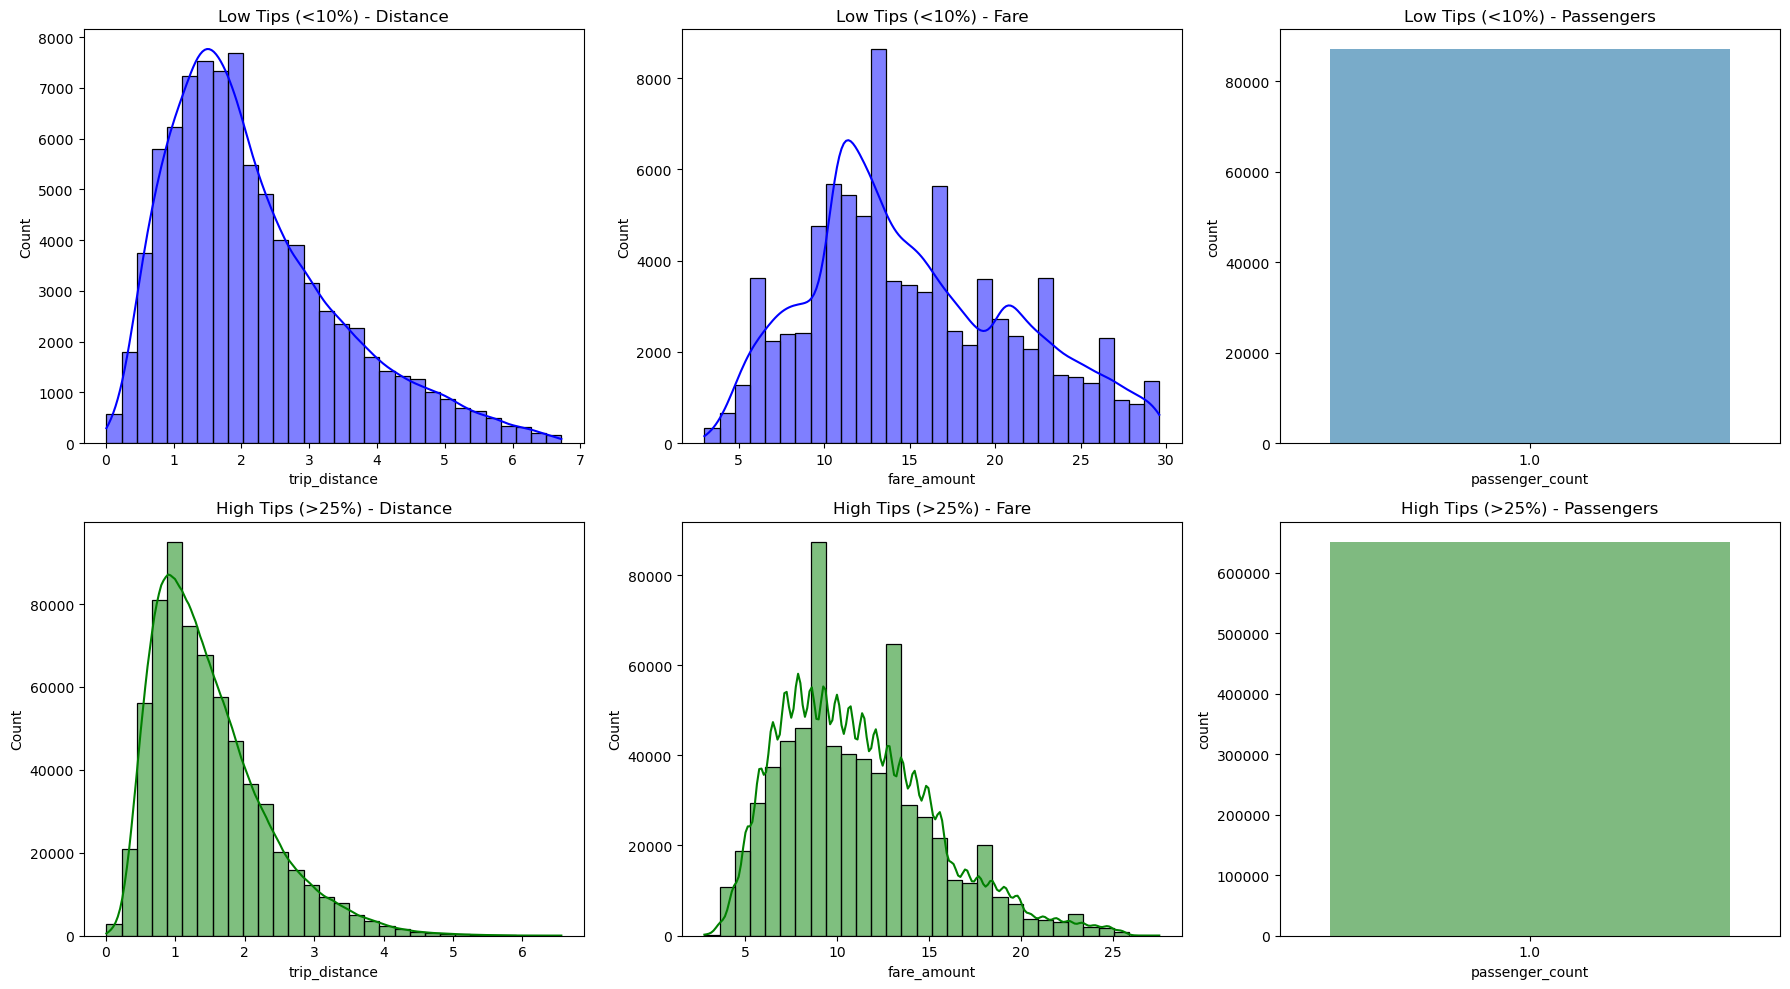

In [122]:
# Keep valid fares only
df = df[df["fare_amount"] > 0].copy()

# Tip % calculation
df["tip_percent"] = (df["tip_amount"] / df["fare_amount"]) * 100

# Filter low and high tip trips
low_tips = df[df["tip_percent"] < 10]
high_tips = df[df["tip_percent"] > 25]

# Create subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Trip distance
sns.histplot(low_tips["trip_distance"], bins=30, kde=True, ax=axs[0, 0], color="blue")
sns.histplot(high_tips["trip_distance"], bins=30, kde=True, ax=axs[1, 0], color="green")
axs[0, 0].set_title("Low Tips (<10%) - Distance")
axs[1, 0].set_title("High Tips (>25%) - Distance")

# Fare amount
sns.histplot(low_tips["fare_amount"], bins=30, kde=True, ax=axs[0, 1], color="blue")
sns.histplot(high_tips["fare_amount"], bins=30, kde=True, ax=axs[1, 1], color="green")
axs[0, 1].set_title("Low Tips (<10%) - Fare")
axs[1, 1].set_title("High Tips (>25%) - Fare")

# Passenger count
sns.countplot(data=low_tips, x="passenger_count", ax=axs[0, 2], palette="Blues_r")
sns.countplot(data=high_tips, x="passenger_count", ax=axs[1, 2], palette="Greens_r")
axs[0, 2].set_title("Low Tips (<10%) - Passengers")
axs[1, 2].set_title("High Tips (>25%) - Passengers")

plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

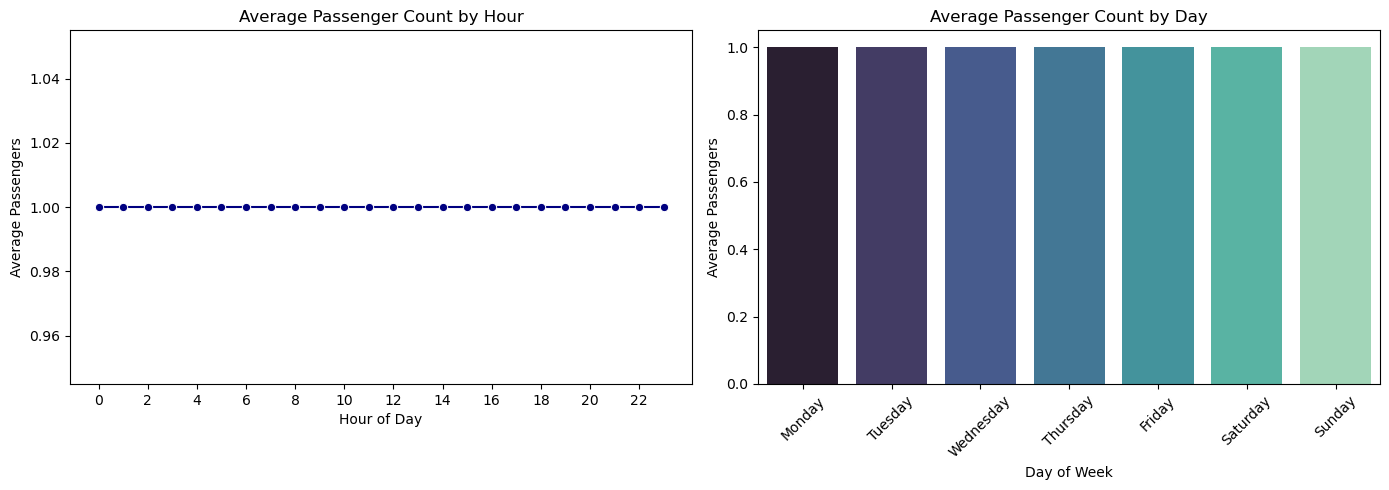

In [123]:
# See how passenger count varies across hours and days
# Analyse variation in passenger count across different hours and days

# Convert pickup time to datetime and extract hour/day
df["pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["hour"] = df["pickup_datetime"].dt.hour
df["day_name"] = df["pickup_datetime"].dt.day_name()

# Average passenger count per hour
avg_passengers_hour = (
    df.groupby("hour")["passenger_count"]
    .mean()
    .reset_index()
)

# Average passenger count per day (ordered Monday → Sunday)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_passengers_day = (
    df.groupby("day_name")["passenger_count"]
    .mean()
    .reset_index()
    .assign(day_name=lambda x: pd.Categorical(x["day_name"], categories=day_order, ordered=True))
    .sort_values("day_name")
)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Hourly trend
sns.lineplot(data=avg_passengers_hour, x="hour", y="passenger_count", marker="o", ax=ax[0], color="navy")
ax[0].set_title("Average Passenger Count by Hour")
ax[0].set_xlabel("Hour of Day")
ax[0].set_ylabel("Average Passengers")
ax[0].set_xticks(range(0, 24, 2))

# Daily trend
sns.barplot(data=avg_passengers_day, x="day_name", y="passenger_count", ax=ax[1], palette="mako")
ax[1].set_title("Average Passenger Count by Day")
ax[1].set_xlabel("Day of Week")
ax[1].set_ylabel("Average Passengers")
ax[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

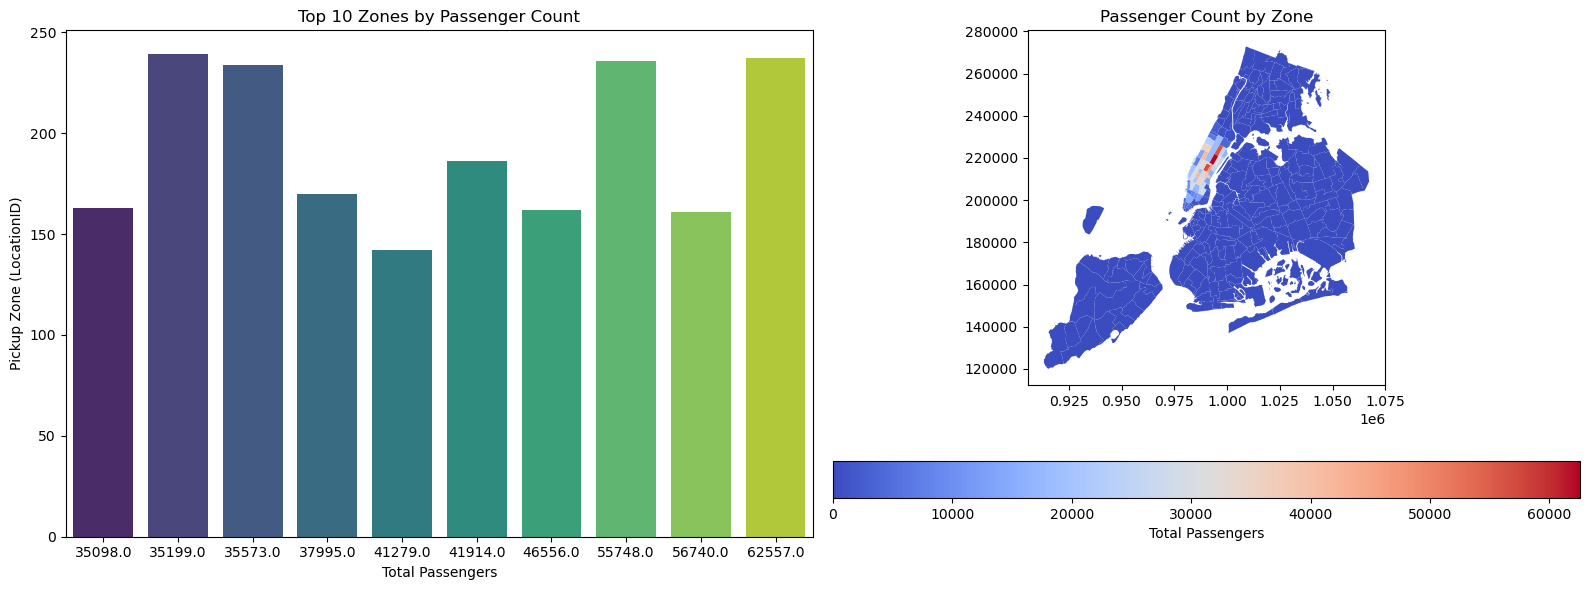

In [125]:
# How does passenger count vary across zones
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Passenger totals by pickup zone ---
zone_totals = (
    df.groupby("PULocationID", as_index=False)["passenger_count"]
      .sum()
      .rename(columns={"passenger_count": "total_passengers"})
)

# --- Load taxi zones and join counts ---
shp_path = r"C:\Users\prash\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp"
zones_gdf = gpd.read_file(shp_path)
zones_gdf = zones_gdf.merge(zone_totals, left_on="LocationID", right_on="PULocationID", how="left")
zones_gdf["total_passengers"] = zones_gdf["total_passengers"].fillna(0)

# --- Plots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) Top 10 zones by passenger count (same orientation as your code)
top10 = zone_totals.nlargest(10, "total_passengers")
sns.barplot(data=top10, x="total_passengers", y="PULocationID", ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Zones by Passenger Count")
axes[0].set_xlabel("Total Passengers")
axes[0].set_ylabel("Pickup Zone (LocationID)")

# (2) Choropleth map of passenger density
zones_gdf.plot(
    column="total_passengers",
    cmap="coolwarm",
    legend=True,
    ax=axes[1],
    legend_kwds={"label": "Total Passengers", "orientation": "horizontal"}
)
axes[1].set_title("Passenger Count by Zone")

plt.tight_layout()
plt.show()

In [147]:
    # For a more detailed analysis, we can use the zones GeoDataFrame
    # Create a new column for the average passenger count in each zone.

    # Ensure PULocationID is an integer
df["PULocationID"] = df["PULocationID"].astype(int)

# Rename the correct passenger count column
zones.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# Drop unnecessary duplicate columns
zones.drop(columns=["PULocationID_y"], errors="ignore", inplace=True)

# Fill missing values with 0 (for zones with no trips)
zones["avg_passenger_count"] = zones["avg_passenger_count"].fillna(0)

# Display cleaned dataset
print(zones[["LocationID", "avg_passenger_count"]].head())

   LocationID  avg_passenger_count
0           1                  0.0
1           2                  0.0
2           3                  0.0
3           4                  1.0
4           5                  0.0


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

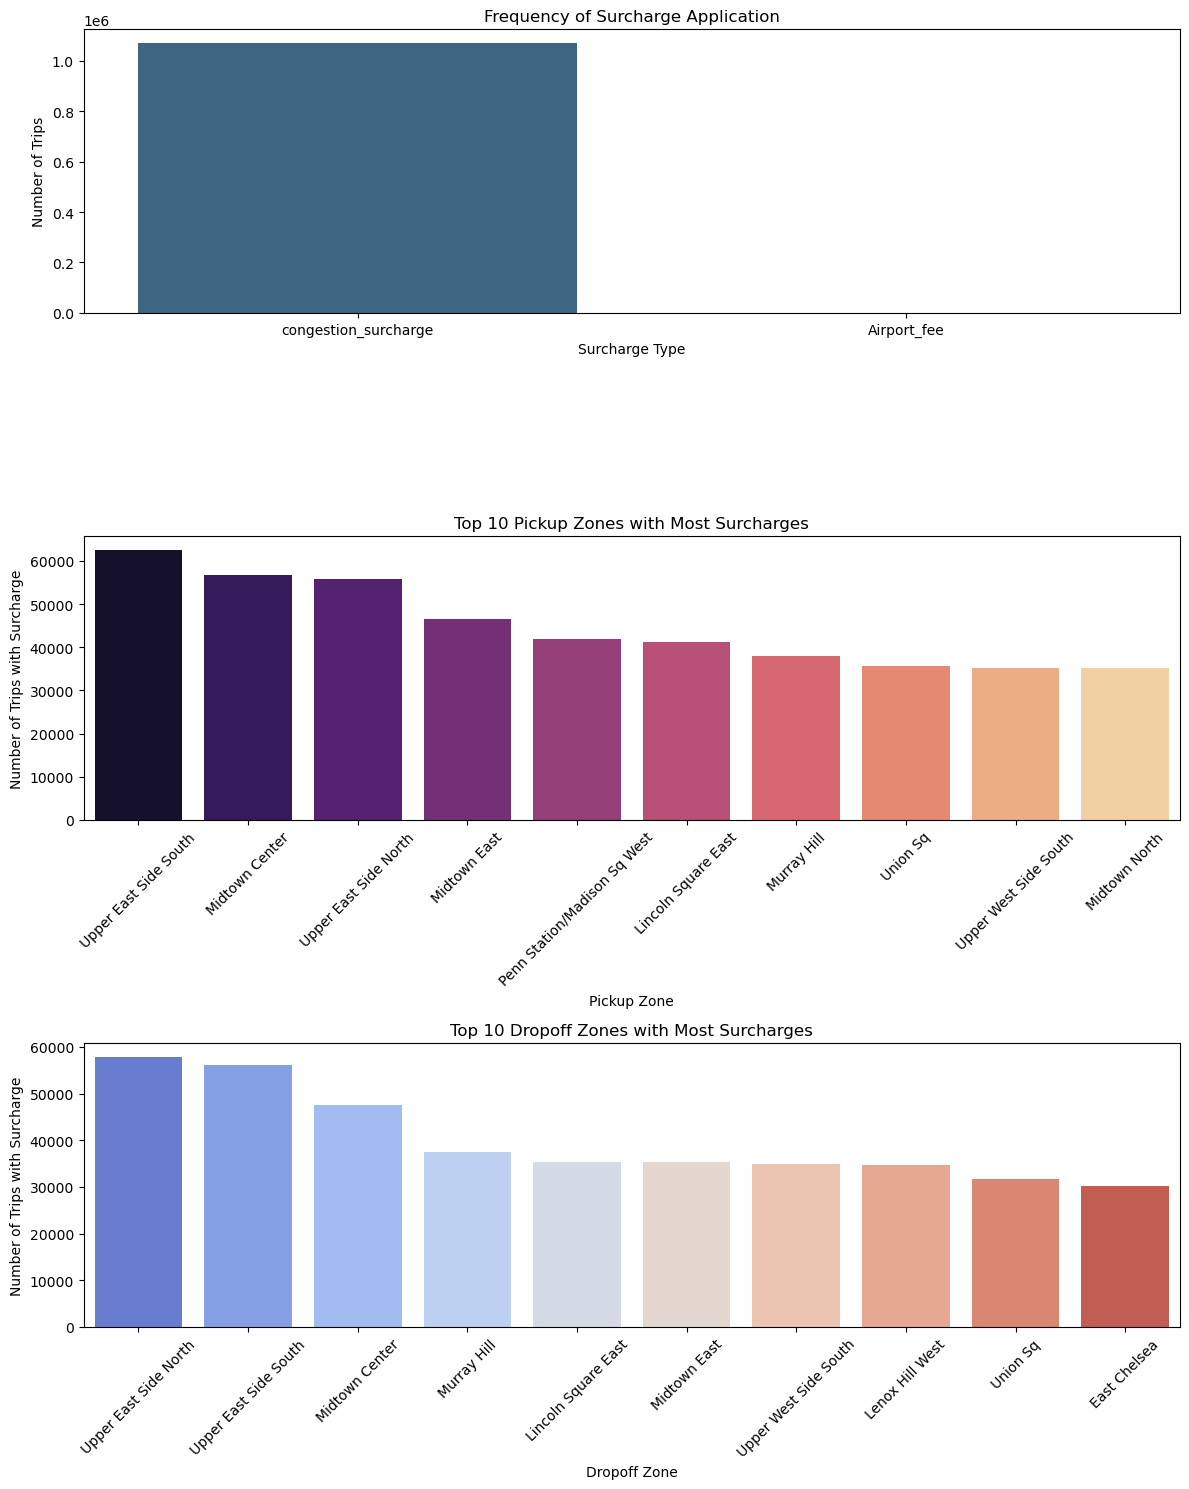

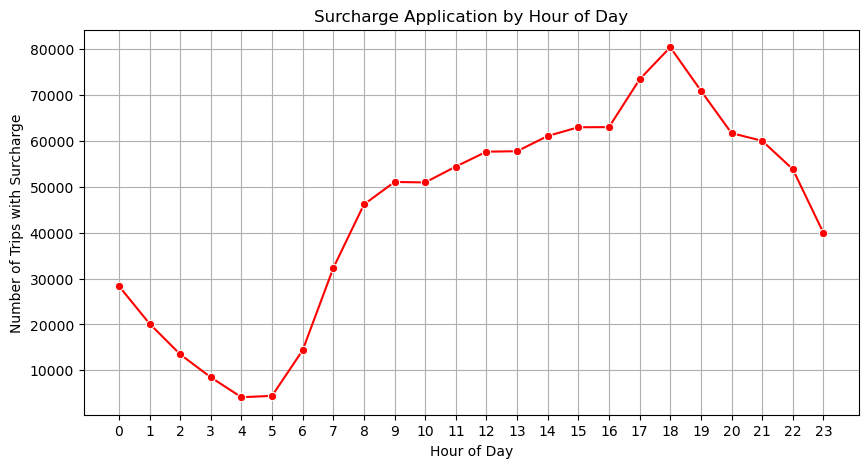

In [148]:
# How often is each surcharge applied?

# Define surcharge-related columns in the dataset
surcharge_columns = ["congestion_surcharge", "Airport_fee"]

# Identify trips with any surcharge applied
df["surcharge_applied"] = (df[surcharge_columns].sum(axis=1) > 0).astype(int)

# Count how often each surcharge is applied
surcharge_counts = df[surcharge_columns].apply(lambda x: (x > 0).sum())

# Convert to DataFrame for plotting
surcharge_counts_df = surcharge_counts.reset_index()
surcharge_counts_df.columns = ["Surcharge Type", "Count"]

# Extract hour from pickup datetime
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Count surcharge occurrences per hour
hourly_surcharge_counts = df.groupby("pickup_hour")["surcharge_applied"].sum().reset_index()

# Count surcharge occurrences per pickup and dropoff zone
pickup_surcharge_counts = df.groupby("PULocationID")["surcharge_applied"].sum().reset_index()
dropoff_surcharge_counts = df.groupby("DOLocationID")["surcharge_applied"].sum().reset_index()

# Merge with taxi zone names
pickup_surcharge_counts = pickup_surcharge_counts.merge(zones[["LocationID", "zone"]],
                                                         left_on="PULocationID", right_on="LocationID", how="left")
dropoff_surcharge_counts = dropoff_surcharge_counts.merge(zones[["LocationID", "zone"]],
                                                           left_on="DOLocationID", right_on="LocationID", how="left")

# Sort by highest surcharge occurrence
top_pickup_surcharge_zones = pickup_surcharge_counts.sort_values(by="surcharge_applied", ascending=False).head(10)
top_dropoff_surcharge_zones = dropoff_surcharge_counts.sort_values(by="surcharge_applied", ascending=False).head(10)

# Visualization: Plot everything
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot surcharge frequency
sns.barplot(x="Surcharge Type", y="Count", data=surcharge_counts_df, palette="viridis", ax=axes[0])
axes[0].set_title("Frequency of Surcharge Application")
axes[0].set_xlabel("Surcharge Type")
axes[0].set_ylabel("Number of Trips")

# Plot surcharge application by pickup/dropoff zone
sns.barplot(x="zone", y="surcharge_applied", data=top_pickup_surcharge_zones, palette="magma", ax=axes[1])
axes[1].set_title("Top 10 Pickup Zones with Most Surcharges")
axes[1].set_xlabel("Pickup Zone")
axes[1].set_ylabel("Number of Trips with Surcharge")
axes[1].tick_params(axis="x", rotation=45)

sns.barplot(x="zone", y="surcharge_applied", data=top_dropoff_surcharge_zones, palette="coolwarm", ax=axes[2])
axes[2].set_title("Top 10 Dropoff Zones with Most Surcharges")
axes[2].set_xlabel("Dropoff Zone")
axes[2].set_ylabel("Number of Trips with Surcharge")
axes[2].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

# Plot surcharge application by time of day
plt.figure(figsize=(10, 5))
sns.lineplot(x="pickup_hour", y="surcharge_applied", data=hourly_surcharge_counts, marker="o", color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips with Surcharge")
plt.title("Surcharge Application by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

# Recommendations to optimize routing and dispatching

Dynamic Pricing based on Time and Location:
Our analysis shows peak demand during 8–10 AM, 5–8 PM, and late nights on weekends, with top zones including airports, business districts, and nightlife areas. Higher fares in these hours/zones can attract more drivers, while lower fares in off-peak hours can boost ridership.

Predictive Modeling for Demand Forecasting:
Using patterns from historical data—such as weekday business peaks, weekend nightlife surges, and seasonal variations—we can forecast high-demand hours and zones. Real-time updates on weather, events, and traffic will further improve accuracy.

Optimized Routing Algorithms:
Incorporate traffic and demand data into routing, ensuring drivers avoid congested routes and are matched quickly to nearby requests. Historic congestion spots can be deprioritized in routing logic.

Targeted Driver Incentives:
Late-night and early-morning hours in entertainment zones have high demand but fewer drivers. Offering temporary bonuses or guaranteed fares in these slots will improve coverage.

Improve Driver Allocation:
Distribute drivers in proportion to predicted demand by hour and day. During peaks, pre-position them in zones like Midtown and airports. During lows, redirect to underserved residential or transport hubs.

Consider Passenger Count and Tip Analysis:
Larger groups and higher tipping patterns occur on airport runs and weekends. Matching vehicle capacity to expected passenger counts can improve utilization. Offer bonuses for low-tip zones/times to maintain driver interest.

Address Surcharge Imbalances:
Surcharges are concentrated around airports and congested city zones. Evaluate fairness and customer perception, and consider policies to reduce unnecessary surcharge triggers.

Integrate with External Data:
Use real-time traffic, public events, and weather to dynamically adjust driver allocation and routing in advance of spikes.

Multi-criteria Optimization:
Balance supply-demand matching, travel time reduction, and driver earnings by adjusting weights in routing algorithms for different priorities.

Monitor and Adapt:
Continuously track KPIs like wait times, trip completion rates, and driver income. Use A/B testing to refine pricing, routing, and allocation strategies over time.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

# Based on the provided analysis, here's a strategy for strategically positioning cabs:

1.Time-Based Deployment:

Deploy more cabs in high-demand zones during peak hours (morning/evening commute, weekends nights).

Redistribute cabs during off-peak hours to ensure wider coverage and faster response times.

2.Day-of-the-Week Adjustments:

Weekdays: Focus on business districts, transport hubs, and commuter-heavy areas.

Weekends: Shift towards entertainment zones, shopping districts, and leisure destinations.

3.Surge Pricing & Driver Incentives:

Apply surge pricing during demand spikes to attract drivers to busy areas.

Offer bonuses for serving low-supply but high-demand zones.

4.Passenger Count & Tip Insights:

Match cab availability to hours/zones with higher passenger counts for group trips.

Provide incentives in areas with lower tipping to maintain service quality.

5.Distance Tier Positioning:

Keep more cabs in short-trip zones for high turnover.

Place cabs near highways for long-distance trip demand.

6.Surcharge Zone Considerations:

Maintain presence in surcharge-heavy areas (e.g., airports, congestion zones) while monitoring customer impact.

7.Predictive & Real-Time Adjustments:

Use historical patterns, weather, and event data for proactive positioning.

Adjust routes and zone coverage dynamically using real-time traffic and demand.

8.Continuous Optimization:

Monitor KPIs (wait times, utilization, customer feedback) and refine deployment regularly.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [154]:
import numpy as np
import pandas as pd

def propose_pricing(df, competitor_data, undercut=0.50, pct_step=0.10,
                    make_tiers_if_missing=True, dynamic_time=True):
    """
    Propose data-driven price adjustments (per mile) by distance tier, staying competitive.
    """
    # --- 1) Prep & guards ---
    w = df.copy()
    w = w[(w["trip_distance"] > 0) & (w["fare_amount"] > 0)].copy()

    if make_tiers_if_missing or "distance_tier" not in w.columns:
        w["distance_tier"] = pd.cut(
            w["trip_distance"], [0, 2, 5, np.inf],
            labels=["0–2 mi", "2–5 mi", "5+ mi"], right=False
        )

    # --- 2) Our average fare per mile by tier ---
    w["fare_per_mile"] = w["fare_amount"] / w["trip_distance"]
    ours = (w.groupby("distance_tier")["fare_per_mile"]
              .mean().reset_index()
              .rename(columns={"fare_per_mile": "fare_per_mile_your"}))

    # --- 3) Merge with competitor table ---
    comp = competitor_data.copy()
    if "fare_per_mile_competitor" not in comp.columns:
        guess = [c for c in comp.columns if c != "distance_tier"]
        if not guess:
            raise ValueError("competitor_data must include competitor fare column.")
        comp = comp.rename(columns={guess[0]: "fare_per_mile_competitor"})

    merged = pd.merge(ours, comp, on="distance_tier", how="inner")

    # --- 4) Base adjustment rule vs competitor ---
    merged["price_diff"] = merged["fare_per_mile_your"] - merged["fare_per_mile_competitor"]
    merged["price_adjustment_pct"] = 0.0
    merged.loc[merged["price_diff"] < -undercut, "price_adjustment_pct"] =  pct_step
    merged.loc[merged["price_diff"] >  undercut, "price_adjustment_pct"] = -pct_step
    merged["$change_reason"] = np.select(
        [merged["price_diff"] < -undercut, merged["price_diff"] > undercut],
        [f"Below competitor by > ${undercut:.2f}", f"Above competitor by > ${undercut:.2f}"],
        default="Within competitive band"
    )

    # --- 5) Optional: scale by hourly demand ---
    if dynamic_time and "tpep_pickup_datetime" in w.columns:
        w["hour"] = pd.to_datetime(w["tpep_pickup_datetime"], errors="coerce").dt.hour
        hour_share = (w.groupby("hour").size() / len(w)).fillna(0)
        scaler = (hour_share - hour_share.mean()) / (hour_share.std(ddof=0) + 1e-9)
        scaler = (0.2 * np.tanh(scaler)) + 1
        tier_counts = w.groupby(["distance_tier","hour"]).size().unstack(fill_value=0)
        tier_scaler = (tier_counts.mul(scaler, axis=1).sum(axis=1) /
                       tier_counts.sum(axis=1).replace(0, 1))
        merged = merged.set_index("distance_tier")
        merged["price_adjustment_pct"] = merged["price_adjustment_pct"] * tier_scaler.reindex(merged.index).fillna(1.0)
        merged = merged.reset_index()

    # --- 6) Suggested new fare/mi ---
    merged["suggested_fare_per_mile"] = (
        merged["fare_per_mile_your"] * (1 + merged["price_adjustment_pct"])
    ).clip(lower=0)

    # Round for presentation
    round_cols = ["fare_per_mile_your","fare_per_mile_competitor","price_diff","suggested_fare_per_mile"]
    merged[round_cols] = merged[round_cols].round(2)
    merged["price_adjustment_pct"] = (merged["price_adjustment_pct"] * 100).round(1)

    return merged[["distance_tier",
                   "fare_per_mile_your",
                   "fare_per_mile_competitor",
                   "price_diff",
                   "$change_reason",
                   "price_adjustment_pct",
                   "suggested_fare_per_mile"]]

# ---------------- Example usage ----------------
# competitor_data must have at least: ['distance_tier','fare_per_mile_competitor']
competitor_data = pd.DataFrame({
    "distance_tier": ["0–2 mi","2–5 mi","5+ mi"],
    "fare_per_mile_competitor": [3.2, 2.5, 2.0]
})

# Run with your trips DataFrame
result = propose_pricing(df, competitor_data)
print(result)


  distance_tier  fare_per_mile_your  fare_per_mile_competitor  price_diff  \
0        0–2 mi                9.45                       3.2        6.25   
1        2–5 mi                6.40                       2.5        3.90   
2         5+ mi                4.73                       2.0        2.73   

                $change_reason  price_adjustment_pct  suggested_fare_per_mile  
0  Above competitor by > $0.50                 -10.9                     8.42  
1  Above competitor by > $0.50                 -10.7                     5.72  
2  Above competitor by > $0.50                 -10.3                     4.24  


In [155]:
# How often is each surcharge applied?

surcharge_columns = ["congestion_surcharge", "Airport_fee", "tolls_amount"]

# Calculate the percentage of non-zero values for each surcharge
surcharge_frequency = (df[surcharge_columns] > 0).mean() * 100

# Convert to DataFrame for easier viewing/plotting
surcharge_freq_df = surcharge_frequency.reset_index()
surcharge_freq_df.columns = ["Surcharge Type", "Frequency (%)"]

print("Frequency of Surcharge Application (%):")
print(surcharge_freq_df)


Frequency of Surcharge Application (%):
         Surcharge Type  Frequency (%)
0  congestion_surcharge          100.0
1           Airport_fee            0.0
2          tolls_amount            0.0
